<a href="https://colab.research.google.com/github/luiseduardoballarati/Data-Science/blob/main/CrimeInLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime in Los Angeles (2020-present)

This dataset reflects incidents of crime in the City of Los Angeles dating back to 2020. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0°, 0°). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database. Please note questions or concerns in the comments.

https://catalog.data.gov/dataset/crime-data-from-2020-to-present

The goal here is to explore new tools and libs such as duckdb, geopy and others and understand a little about this dataset. The goal is to create some reports and do some feature engineering, not to create a machine learning algorithm. There are some analysis that I just show how to do it and not pursue it, also, there may be some errors and this is not a professional work, just a little project to explore new libs and keep practicing.

Alright, let's dive in. Some little explanation of each column is provided:
  - DR_NO: Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits
  - Date Rptd: Day the crime was reported
  - Date OCC: Day the crime occured
  - TIME OCC: Time the crime occured in 24 hour military time.
  - AREA: The LAPD (los Angeles Police Department) has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
  - AREA NAME: The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.
  - Rpt Dist No: A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City
  - Crm Cd: Indicates the crime committed. (Same as Crime Code 1)
  - Crm Cd Desc: Defines the Crime Code provided.
  - Mocodes: Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf
- Vict Age: Two character numeric
- Vict Sex: F - Female M - Male X - Unknown
- Vict Descent: Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
- Premis Cd: The type of structure, vehicle, or location where the crime took place.
- Premis Desc: Defines the Premise Code provided.
- Weapons Used Cd: The type of weapon used in the crime.
Weapon Desc: Defines the Weapon Used Code provided.
- Status: Status of the case. (IC is the default)
- Status Desc: Defines the Status Code provided.
- Crm Cd 1: Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.
- Crm Cd 2: May contain a code for an additional crime, less serious than Crime Code 1.
- Crm Cd 3: May contain a code for an additional crime, less serious than Crime Code 1.
- Crm Cd 4: May contain a code for an additional crime, less serious than Crime Code 1.
- LOCATION: Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
- Cross Street: Cross Street of rounded Address
- LAT: Latitude
- LON: Longitude

Required installation and imports so far:

In [3]:
import pandas as pd
import plotly.express as px
import plotly
import duckdb
import missingno as msno
import plotly.io as pio
# with that we can display our charts in github, although they will not be interactive (be sure to install kaleido lib for that and to have the latest plotly version installed)
pio.renderers.default = "svg"

The rest we will add along the model.

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Crime_Data_from_2020_to_Present.csv")
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726526,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
726527,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
726528,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
726529,232009355,05/01/2023 12:00:00 AM,05/01/2023 12:00:00 AM,1330,20,Olympic,2025,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,300 S ALEXANDRIA AV,NaN,34.0690,-118.2979


In [6]:
columns_list = df.columns.tolist()

# Data preparation

In [7]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,7.265310e+05,726531.000000,726531.000000,726531.000000,726531.000000,726531.000000,726531.000000,726522.000000,252078.000000,726523.000000,53930.000000,1805.000000,54.000000,726531.000000,726531.000000
mean,2.141942e+08,1334.688239,10.717964,1118.180167,1.416018,500.825131,29.928622,305.789285,362.502587,500.562595,957.075969,983.460388,989.925926,33.967245,-117.984847
std,9.984046e+06,653.777102,6.091058,609.109622,0.492897,207.965762,21.710341,216.833636,123.695237,207.753308,112.327666,52.027786,29.327591,1.903185,6.600270
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.020155e+08,900.000000,6.000000,622.000000,1.000000,331.000000,11.000000,101.000000,309.000000,331.000000,998.000000,998.000000,998.000000,34.013300,-118.429400
50%,2.118056e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058400,-118.321400
75%,2.213134e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163000,-118.273900
max,2.399097e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,973.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


First thing we get here its that in Vict Age column we have negative values. Let's understand it:

In [8]:
Vict = df[df['Vict Age'] <= 0]
Vict.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.768790e+05,176879.000000,176879.000000,176879.000000,176879.000000,176879.000000,176879.000000,176870.000000,20073.000000,176875.000000,11308.000000,119.000000,2.0,176879.000000,176879.000000
mean,2.142275e+08,1374.682478,10.775903,1124.085024,1.196530,505.493513,-0.000334,217.198722,338.819559,505.404331,982.476035,980.453782,998.0,33.960772,-117.972595
std,1.011364e+07,657.251790,5.879819,588.823754,0.397375,155.917670,0.020589,191.919312,151.847500,155.831243,77.391766,63.008306,0.0,1.915573,6.643350
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,220.000000,653.000000,998.0,0.000000,-118.667300
25%,2.020086e+08,900.000000,6.000000,636.000000,1.000000,420.000000,0.000000,101.000000,200.000000,420.000000,998.000000,998.000000,998.0,34.007500,-118.418400
50%,2.117127e+08,1500.000000,11.000000,1162.000000,1.000000,510.000000,0.000000,108.000000,400.000000,510.000000,998.000000,998.000000,998.0,34.057800,-118.311300
75%,2.213185e+08,1900.000000,15.000000,1586.000000,1.000000,510.000000,0.000000,213.000000,500.000000,510.000000,998.000000,998.000000,998.0,34.154500,-118.270200
max,2.399090e+08,2359.000000,21.000000,2197.000000,2.000000,956.000000,0.000000,971.000000,516.000000,956.000000,999.000000,999.000000,998.0,34.334300,0.000000


In [9]:
df['Vict Age'].value_counts()

 0      176828
 30      16742
 35      16342
 29      15956
 31      15950
         ...  
 98         56
 97         56
-1          43
-2           8
 120         1
Name: Vict Age, Length: 102, dtype: int64

In [10]:
Vict['Vict Age'].value_counts()

 0    176828
-1        43
-2         8
Name: Vict Age, dtype: int64

We can assume that values lower than 0 means that the age of the victim was not recorded. Let's exclude this values for further analysis, but let's keep the rows.

Let's check missing values now:


<Axes: >

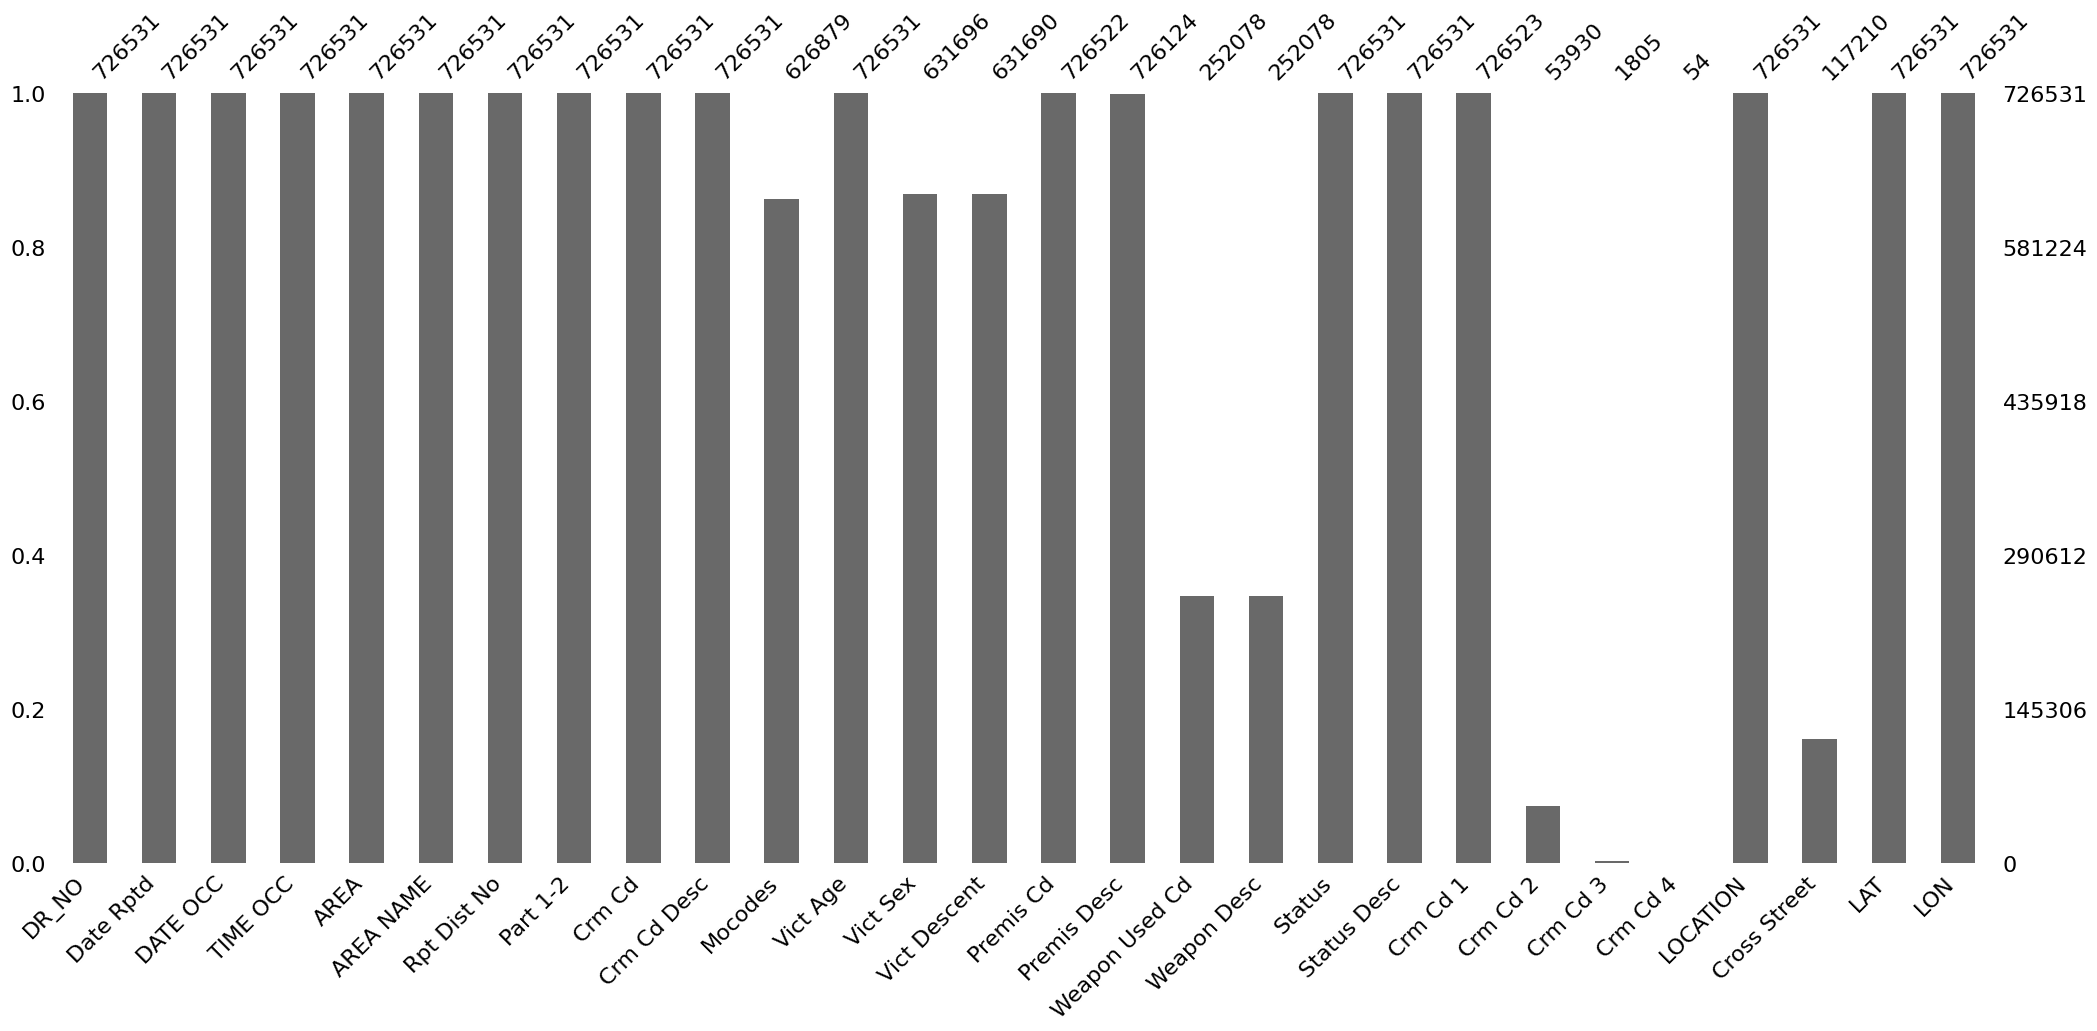

In [11]:
df.isna().sum()
msno.bar(df)

<Axes: >

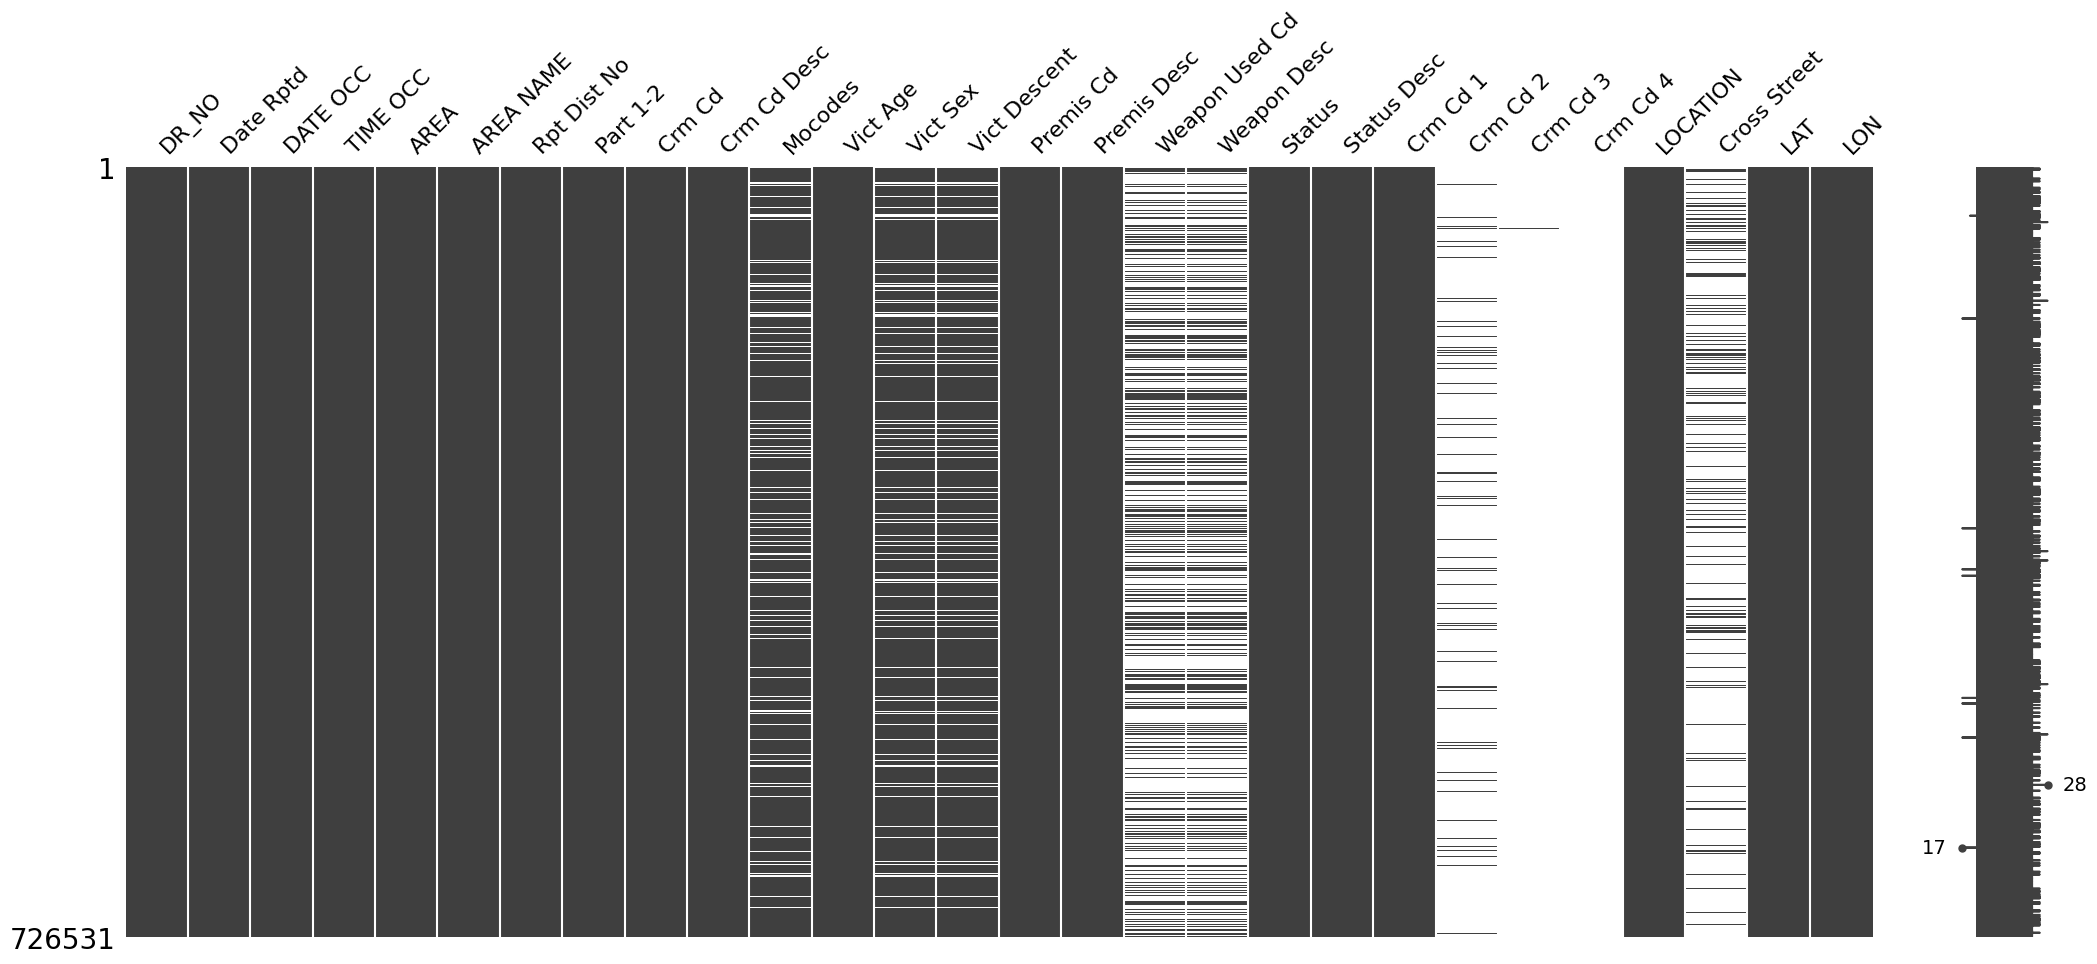

In [12]:
msno.matrix(df)

Now for the coordinates, its fair to assume that some coordinates were misstyped. For that, we are going to consider only latitudes and logitudes that lay between Los Angeles Area coordinates, as explained in the image below:

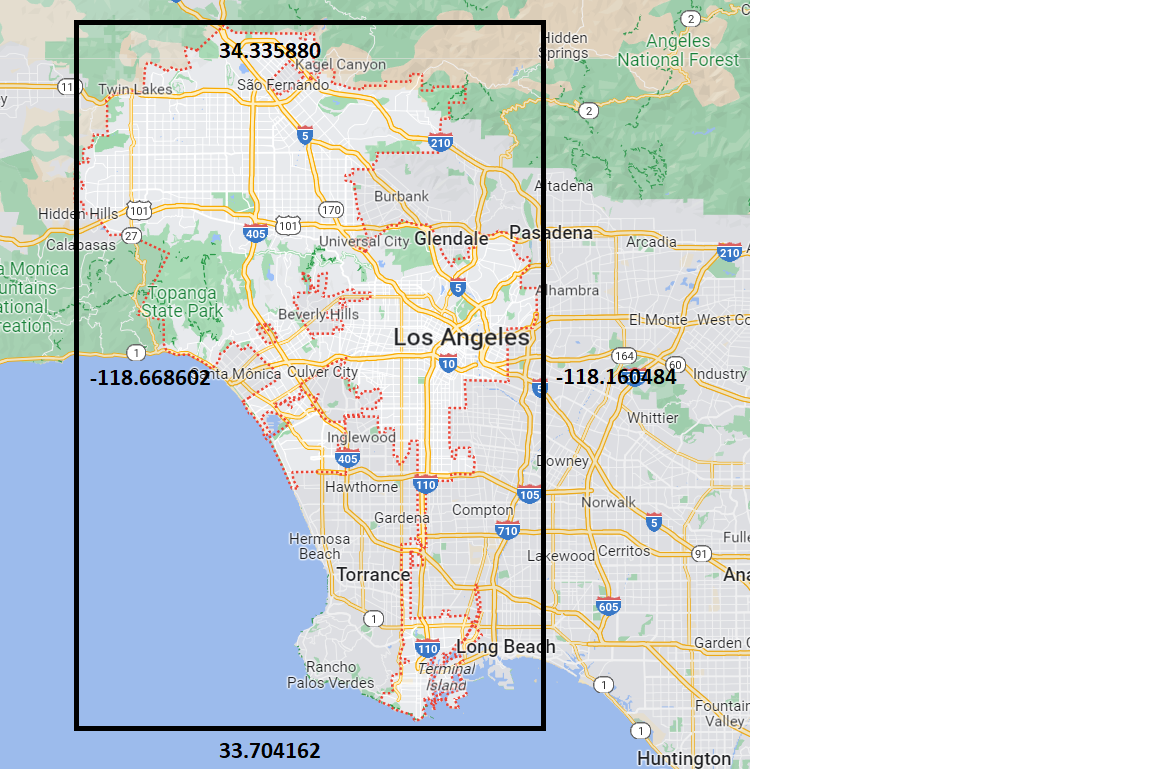

In [13]:
LATLON = df[(df.LAT >= 33.704162) & ( df.LAT <= 34.335880) & (df.LON <= -118.160484) & (df.LON >= -118.668602)]
LATLON.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,7.241930e+05,724193.000000,724193.000000,724193.000000,724193.000000,724193.000000,724193.000000,724184.000000,251222.000000,724185.000000,53706.000000,1805.000000,54.000000,724193.000000,724193.000000
mean,2.142146e+08,1334.780518,10.719314,1118.315379,1.415137,500.298347,29.926555,305.675676,362.393063,500.035545,956.946561,983.460388,989.925926,34.073516,-118.354005
std,9.989626e+06,654.213633,6.090757,609.073651,0.492746,207.789551,21.709914,216.830929,123.807168,207.575982,112.488764,52.027786,29.327591,0.111131,0.104215
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,33.706100,-118.667600
25%,2.020158e+08,900.000000,6.000000,622.000000,1.000000,331.000000,11.000000,101.000000,308.000000,331.000000,998.000000,998.000000,998.000000,34.014500,-118.429800
50%,2.118073e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058700,-118.322100
75%,2.213143e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163500,-118.274000
max,2.399097e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,973.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,-118.160500


Almost all the coordinates are located in the interval we set before. Let's check those that are not.

In [14]:
LATLON_ = df[(df.LAT <= 33.704162) | ( df.LAT >= 34.335880) | (df.LON >= -118.160484) | (df.LON <= -118.668602)]
LATLON_.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.338000e+03,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,856.000000,2338.000000,224.000000,0.0,0.0,2338.000000,2338.000000
mean,2.078596e+08,1306.104790,10.299829,1076.298546,1.689050,663.995723,30.568862,340.979042,394.646028,663.813944,988.102679,NaN,NaN,1.050007,-3.638750
std,4.991301e+06,499.851898,6.170548,618.863046,0.462981,198.111931,21.837551,214.843735,78.361374,198.124948,54.597042,NaN,NaN,5.891809,20.417796
min,2.001098e+08,1.000000,1.000000,101.000000,1.000000,110.000000,0.000000,101.000000,101.000000,110.000000,623.000000,NaN,NaN,0.000000,-118.160400
25%,2.017096e+08,1030.000000,6.000000,622.000000,1.000000,510.000000,10.000000,104.000000,400.000000,510.000000,998.000000,NaN,NaN,0.000000,0.000000
50%,2.106096e+08,1320.000000,10.000000,1024.500000,2.000000,626.000000,32.000000,403.000000,400.000000,626.000000,998.000000,NaN,NaN,0.000000,0.000000
75%,2.113181e+08,1630.000000,16.000000,1618.000000,2.000000,888.000000,47.000000,502.000000,400.000000,888.000000,998.000000,NaN,NaN,0.000000,0.000000
max,2.309094e+08,2358.000000,21.000000,2189.000000,2.000000,956.000000,92.000000,962.000000,515.000000,956.000000,998.000000,NaN,NaN,34.098600,0.000000


This is correct because, out of 726531, 724193 are coordinates that make sense and 2338 are coordinates that do not. If we sum up, we get the total.

In [15]:
LATLON_.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [16]:
LATLON_[['AREA', 'AREA NAME', 'Rpt Dist No', 'LOCATION', 'Cross Street', 'LAT', 'LON']]

,AREA,AREA NAME,Rpt Dist No,LOCATION,Cross Street,LAT,LON
1404,3,Southwest,361,4800 COLISEUM ST,NaN,0.0000,0.0000
2109,7,Wilshire,758,1000 QUEEN ANNE PL,NaN,0.0000,0.0000
2154,4,Hollenbeck,409,4300 ALPHA ST,NaN,34.0945,-118.1593
3158,2,Rampart,271,1000 S ALVARADO ST,NaN,0.0000,0.0000
3793,4,Hollenbeck,409,5600 N HUNTINGTON DR,NaN,34.0955,-118.1574
...,...,...,...,...,...,...,...
664204,2,Rampart,252,WASHINGTON BL,RAMPART BL,0.0000,0.0000
668207,4,Hollenbeck,409,5600 BERKSHIRE DR,NaN,34.0968,-118.1585
685261,4,Hollenbeck,409,4300 WINCHESTER AV,NaN,34.0941,-118.1600
687719,4,Hollenbeck,409,4300 WINCHESTER AV,NaN,34.0941,-118.1600


Maybe we can increase the range. It seems that, other that LAT and LON = 0.0, we have coordinates that exist in the LA area.

In [17]:
LATLON__ = df[(df.LAT != 0) & (df.LON != 0)]
LATLON__[['LAT', 'LON']].describe()

,LAT,LON
count,724265.000000,724265.000000
mean,34.073518,-118.353985
std,0.111126,0.104228
min,33.706100,-118.667600
25%,34.014500,-118.429700
50%,34.058700,-118.322100
75%,34.163400,-118.274000
max,34.334300,-118.155400


We have few mistakes apparently. Only 2266 adresses don't have the latitude and longitude correctly,out of 726531. We could try to get the latitude and longitude using Google Maps APIs and as input the adresses.

In [18]:
LATLON0 = df[(df.LAT == 0) & (df.LON == 0)]
LATLON0 = LATLON0[['DR_NO', 'LOCATION','LAT', 'LON']].reset_index(drop=True)
LATLON0.head()

,DR_NO,LOCATION,LAT,LON
0,200311971,4800 COLISEUM ST,0.0,0.0
1,210705082,1000 QUEEN ANNE PL,0.0,0.0
2,200208374,1000 S ALVARADO ST,0.0,0.0
3,200817064,OLYMPIC BL,0.0,0.0
4,201711596,DEVONSHIRE ST,0.0,0.0


Let's use geopy. It will work on most cases I believe, as long as we specify that the city is LA. Now we got figure out how to create the function.

In [19]:
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

location = geolocator.geocode("4800 Coliseum St, Los Angeles, CA 90016, EUA")

print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

The latitude of the location is:  34.01819104819277
The longitude of the location is:  -118.35115385542169


In [20]:
location = geolocator.geocode("1000 QUEEN ANNE PL")

#address = location.altitude # nice
#print(address)

print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

location = geolocator.reverse(str(location.latitude)+","+str(location.longitude))

address = location.raw['address']
print(address)

# traverse the data
city = address.get('city', '')
state = address.get('state', '')
country = address.get('country', '')
code = address.get('country_code')
zipcode = address.get('postcode')
print('City : ', city)
print('State : ', state)
print('Country : ', country)
print('Zip Code : ', zipcode)
# f"{LATLON0.LOCATION}, Los Angeles, CA 90016, EUA"


The latitude of the location is:  34.055654
The longitude of the location is:  -118.329759
{'house_number': '1000', 'road': 'Queen Anne Place', 'neighbourhood': 'Victoria Park', 'suburb': 'Mid-Wilshire', 'city': 'Los Angeles', 'county': 'Los Angeles County', 'state_district': 'CAL Fire Southern Region', 'state': 'California', 'ISO3166-2-lvl4': 'US-CA', 'postcode': '90019', 'country': 'United States', 'country_code': 'us'}
City :  Los Angeles
State :  California
Country :  United States
Zip Code :  90019


In [21]:
LATLON0['LOCATION'].head()

0    4800    COLISEUM                     ST
1    1000    QUEEN ANNE                   PL
2    1000 S  ALVARADO                     ST
3            OLYMPIC                      BL
4            DEVONSHIRE                   ST
Name: LOCATION, dtype: object

In [22]:
LATLON0['LOCATION_FOUND']=''
LATLON0['CITY']=''
LATLON0['COUNTRY']=''

for index in LATLON0.head().index:
  # putting the location in a local variable
  adress = LATLON0.LOCATION[index]
  # assessing the local variable to the geolocator
  location = geolocator.geocode(f'{adress}')
  # transformation to get the city, country, state and so on
  location = geolocator.reverse(str(location.latitude)+","+str(location.longitude))
  address = location.raw['address']

  LATLON0['LOCATION_FOUND'][index] = location
  LATLON0.CITY[index] = address.get('city', '')
  LATLON0.COUNTRY[index] = address.get('country', '')
  LATLON0.LAT[index] = location.latitude
  LATLON0.LON[index] = location.longitude

LATLON0.head()

<ipython-input-22-9a25db53d7ed>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-9a25db53d7ed>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-9a25db53d7ed>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-9a25db53d7ed>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

,DR_NO,LOCATION,LAT,LON,LOCATION_FOUND,CITY,COUNTRY
0,200311971,4800 COLISEUM ST,29.923184,-90.106640,"(4800, Coliseum Street, Garden District, New O...",New Orleans,United States
1,210705082,1000 QUEEN ANNE PL,34.055654,-118.329759,"(1000, Queen Anne Place, Victoria Park, Mid-Wi...",Los Angeles,United States
2,200208374,1000 S ALVARADO ST,34.051516,-118.279877,"(Alvarado & Olympic, South Alvarado Street, Pi...",Los Angeles,United States
3,200817064,OLYMPIC BL,48.140315,17.121257,"(Eurovea, Pribinova, Bratislavský downtown, Br...",Bratislava,Slovensko
4,201711596,DEVONSHIRE ST,51.526303,-0.046750,"(Devonshire Street, Warley Street, Globe Town,...",London,United Kingdom


Unfortunally, we would got timeout error because we could not process all the 2200 rows, but we can see that it would work. The second thing would be trying to explain to the funtion that those adresses are in LA, not other places. In the last row, for example, we got an adress in London.

I tried to pass in the address instead of:
    #location = geolocator.geocode(f'{adress}')
    #location = geolocator.geocode(f'{adress}, Los Angeles, CA 90016, EUA')

But we got an error that no place was found.

After getting this right, we would join using inner join and DR_NO as the key the LATLON0 and df to have all the Locations with the right Latitude and Longitude and this way we would not miss and delete no data because of empty values in LAT, LON or LOCATION.

Let's explore now the folium lib.

In [23]:
LATLON__.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


This is going to be the df we are going to use, ignoring the LAT and LON = 0 and with some errors.

In [24]:
places = LATLON__.groupby(by=["AREA"]).mean()
places = places[['LAT', 'LON']]

<ipython-input-24-4e0347836244>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [25]:
import folium
from folium.plugins import MarkerCluster
print(folium.__version__)

0.14.0


In [114]:
mapa = folium.Map(
    width=1000, height=800,
    location=[34, -118],
    zoom_start=8
)
#folium.GeoJson(geo_json_data).add_to(mapa)
mc = MarkerCluster()

for index, rows in places.iterrows():
  mc.add_child(folium.Marker([rows['LAT'], rows['LON']],
              icon=folium.Icon(icon='warning'))).add_to(mapa)


mapa

These are the mean of the locations that happened the crimes in the 21 areas above.

## Initial Analysis

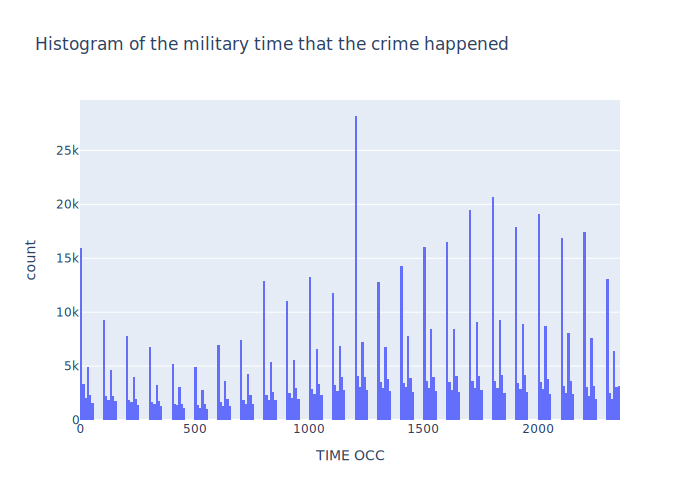

In [27]:
fig = px.histogram(LATLON__, x="TIME OCC", title="Histogram of the military time that the crime happened")
fig.show()

I dont know if this is accurate, because it is said in the chart that most crimes happened between 12:00 and 12:09, now that can be P.M. or A.M. Although there is military time for 00:00 (which is 00), maybe some inputs were misstyped.

In [28]:
LATLON__.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

First thing we need to do is change the data type of DATE OCC and TIME Rptd to datetime.

In [29]:
LATLON__['DATE OCC 2'] = LATLON__['DATE OCC'].apply(lambda num : num[0:10])
LATLON__['Date Rptd 2'] = LATLON__['Date Rptd'].apply(lambda num : num[0:10])

LATLON__.head()

<ipython-input-29-eeb5d4470847>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-eeb5d4470847>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DATE OCC 2,Date Rptd 2
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,01/08/2020,01/08/2020
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,01/01/2020,01/02/2020
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,02/13/2020,04/14/2020
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,01/01/2020,01/01/2020
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,01/01/2020,01/01/2020


In [30]:
LATLON__.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
DATE OCC 2         object
Date Rptd 2        object
dtype: object

In [31]:
LATLON__["DATE OCC 2"] = pd.to_datetime(LATLON__["DATE OCC 2"])
LATLON__["Date Rptd 2"] = pd.to_datetime(LATLON__["Date Rptd 2"])

<ipython-input-31-ddfd6bd1f809>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-ddfd6bd1f809>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
print(LATLON__["DATE OCC 2"].head())
print('--')
print(LATLON__['DATE OCC'].head())
print('-------------------')
print(LATLON__["Date Rptd 2"].head())
print('--')
LATLON__['Date Rptd'].head()

0   2020-01-08
1   2020-01-01
2   2020-02-13
3   2020-01-01
4   2020-01-01
Name: DATE OCC 2, dtype: datetime64[ns]
--
0    01/08/2020 12:00:00 AM
1    01/01/2020 12:00:00 AM
2    02/13/2020 12:00:00 AM
3    01/01/2020 12:00:00 AM
4    01/01/2020 12:00:00 AM
Name: DATE OCC, dtype: object
-------------------
0   2020-01-08
1   2020-01-02
2   2020-04-14
3   2020-01-01
4   2020-01-01
Name: Date Rptd 2, dtype: datetime64[ns]
--


0    01/08/2020 12:00:00 AM
1    01/02/2020 12:00:00 AM
2    04/14/2020 12:00:00 AM
3    01/01/2020 12:00:00 AM
4    01/01/2020 12:00:00 AM
Name: Date Rptd, dtype: object

Ok, looks alright.

In [33]:
LATLON__.dtypes

DR_NO                      int64
Date Rptd                 object
DATE OCC                  object
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
DATE OCC 2        datetime64[ns]
Date Rptd 2       datetime64[ns]
dtype: obj

In [34]:
df1 = LATLON__.groupby(['DATE OCC 2']).count()
df1.sort_index()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Rptd 2
DATE OCC 2,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,...,1085,1085,115,7,1,1085,132,1085,1085,1085
2020-01-02,527,527,527,527,527,527,527,527,527,527,...,527,527,40,0,0,527,79,527,527,527
2020-01-03,593,593,593,593,593,593,593,593,593,593,...,593,593,47,3,0,593,84,593,593,593
2020-01-04,539,539,539,539,539,539,539,539,539,539,...,539,539,43,1,0,539,104,539,539,539
2020-01-05,505,505,505,505,505,505,505,505,505,505,...,505,505,37,0,0,505,89,505,505,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-18,439,439,439,439,439,439,439,439,439,439,...,439,439,33,2,0,439,67,439,439,439
2023-05-19,494,494,494,494,494,494,494,494,494,494,...,494,494,33,3,0,494,79,494,494,494
2023-05-20,440,440,440,440,440,440,440,440,440,440,...,440,440,42,0,0,440,66,440,440,440


In [35]:
df1.DR_NO.mean()

585.0282714054928

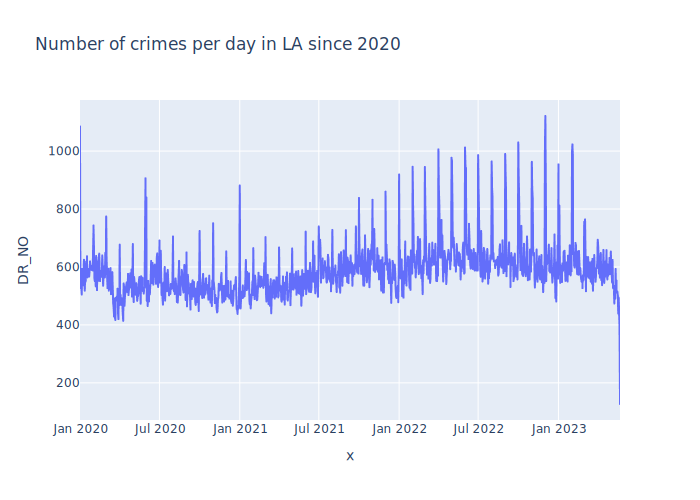

In [36]:
fig = px.line(df1.sort_index(), x=df1.sort_index().index, y="DR_NO", title='Number of crimes per day in LA since 2020')
fig.show()

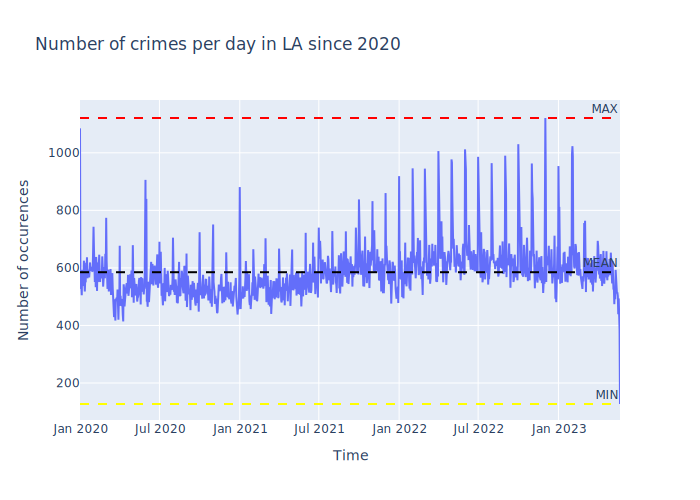

In [37]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df1.sort_index().index, y=df1.DR_NO,
                    mode='lines',
                    name='lines'))
fig.add_hline(y=df1.DR_NO.mean(), line_width=2, line_dash="dash", line_color="black", annotation_text="MEAN")
fig.add_hline(y=df1.DR_NO.max(), line_width=2, line_dash="dash", line_color="red", annotation_text="MAX")
fig.add_hline(y=df1.DR_NO.min(), line_width=2, line_dash="dash", line_color="yellow", annotation_text="MIN")

fig.update_layout(title='Number of crimes per day in LA since 2020',
                   xaxis_title='Time',
                   yaxis_title='Number of occurences')

fig.show()

It seems that sometimes crime number's exploded. Let's dive in:

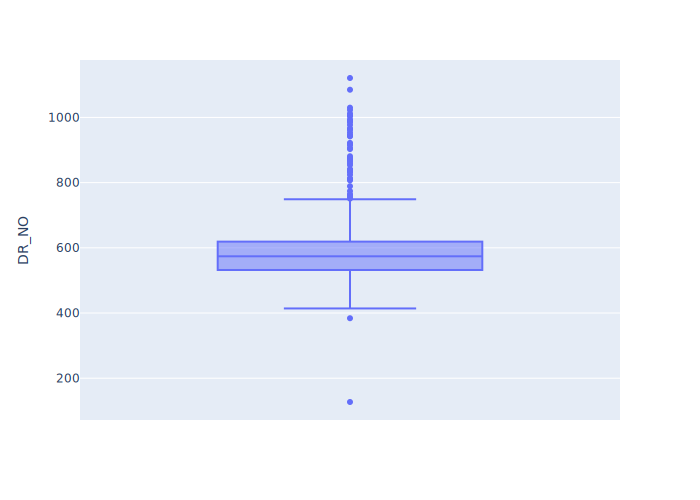

In [38]:
fig = px.box(df1, y="DR_NO")
fig.show()

The upper fence is 749, let's use that number:

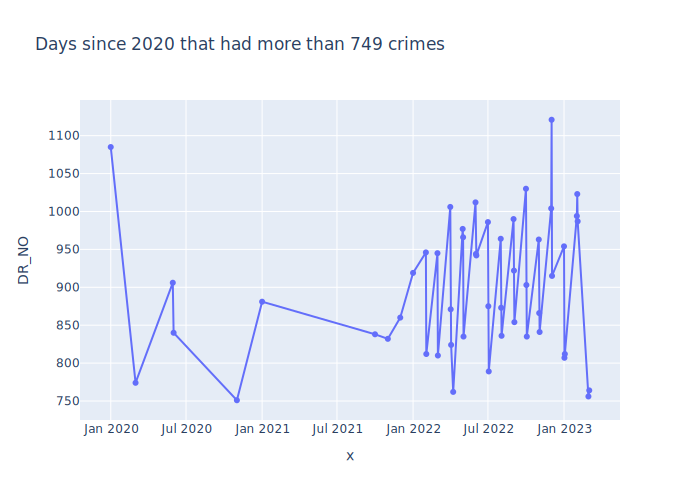

In [39]:
df1_ = df1[(df1.DR_NO > 749)]
fig = px.line(df1_.sort_index(), x=df1_.index, y="DR_NO", title='Days since 2020 that had more than 749 crimes', markers=True)
fig.show()

There is something because most appearances are for first days of the months. Unfortunally, I cannot conclude anything.


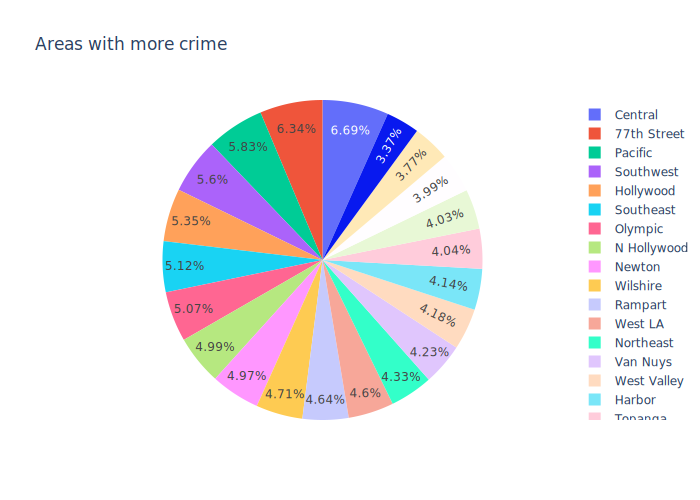

In [40]:
df2 = df.groupby(['AREA NAME']).count()
fig = px.pie(df2, values='DR_NO', names=df2.index, title='Areas with more crime')
fig.show()

In [41]:
df['Crm Cd Desc'].nunique()

138

There are some areas to avoid, it seems. And since 2020, 138 different crimes were recorded.

In [42]:
df3 = df.groupby(['Crm Cd Desc']).count()
df3_0 = df3.sort_values(by='DR_NO', ascending=False).head(10)

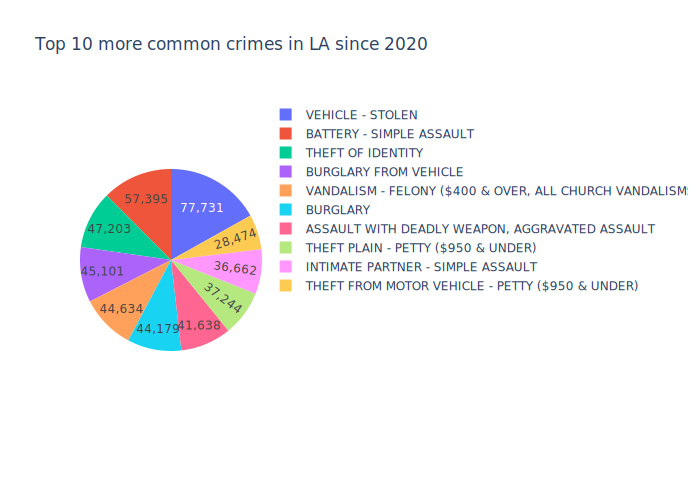

In [43]:
fig = px.pie(df3_0, values='DR_NO', names=df3_0.index, title='Top 10 more common crimes in LA since 2020')
fig.update_traces(textinfo='value')
fig.show()

The most often crimes were vehicle steal, simple assault and so on and so forth.

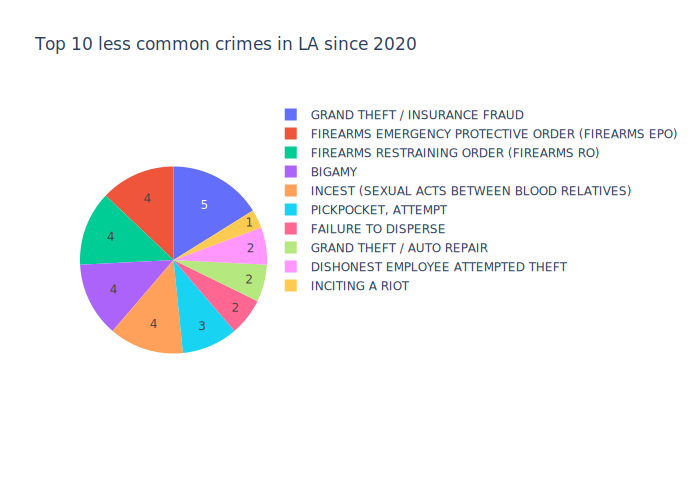

In [44]:
df3_1 = df3.sort_values(by='DR_NO', ascending=True).head(10)
fig = px.pie(df3_1, values='DR_NO', names=df3_1.index, title='Top 10 less common crimes in LA since 2020')
fig.update_traces(textinfo='value')
fig.show()

The least commom crime was 'inciting a riot', that happened one time.

In [45]:
print(f'There has been {df.DR_NO.max()} crimes in LA since {df["Date Rptd"].min()}')

There has been 239909747 crimes in LA since 01/01/2020 12:00:00 AM


Now let's see if there is a big difference in the day that the crime occured and the day that it was it was reported:

In [46]:
LATLON__['Checking_Dates'] = LATLON__['Date Rptd 2'] - LATLON__['DATE OCC 2']
LATLON__['Checking_Dates'].value_counts()

<ipython-input-46-94ab2c565f0d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0 days       357445
1 days       157361
2 days        44944
3 days        26306
4 days        16971
              ...  
775 days          1
1023 days         1
645 days          1
966 days          1
792 days          1
Name: Checking_Dates, Length: 1084, dtype: int64

Most crimes were reported as soon as they occured, but we have some cases that the crime was reported more than 2 years after the crime. Let's dive in to that:

In [47]:
LATLON__['Checking_Dates']

0         0 days
1         1 days
2        61 days
3         0 days
4         0 days
           ...  
726526    1 days
726527    0 days
726528    0 days
726529    0 days
726530    0 days
Name: Checking_Dates, Length: 724265, dtype: timedelta64[ns]

In [48]:
reported = LATLON__.query('Checking_Dates != "0 days"')
reported = reported.groupby(['Checking_Dates']).count()
reported

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DATE OCC 2,Date Rptd 2
Checking_Dates,,,,,,,,,,,,,,,,,,,,,
1 days,157361,157361,157361,157361,157361,157361,157361,157361,157361,157361,...,157360,8602,284,9,157361,25127,157361,157361,157361,157361
2 days,44944,44944,44944,44944,44944,44944,44944,44944,44944,44944,...,44944,1719,55,1,44944,6313,44944,44944,44944,44944
3 days,26306,26306,26306,26306,26306,26306,26306,26306,26306,26306,...,26306,954,43,0,26306,3374,26306,26306,26306,26306
4 days,16971,16971,16971,16971,16971,16971,16971,16971,16971,16971,...,16971,548,24,2,16971,2115,16971,16971,16971,16971
5 days,12333,12333,12333,12333,12333,12333,12333,12333,12333,12333,...,12333,362,17,1,12333,1440,12333,12333,12333,12333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219 days,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,0,1,1,1,1
1228 days,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,0,1,1,1,1
1232 days,2,2,2,2,2,2,2,2,2,2,...,2,0,0,0,2,1,2,2,2,2


In [49]:
reported.index.astype('str')

Index(['1 days', '2 days', '3 days', '4 days', '5 days', '6 days', '7 days',
       '8 days', '9 days', '10 days',
       ...
       '1207 days', '1210 days', '1215 days', '1216 days', '1217 days',
       '1219 days', '1228 days', '1232 days', '1233 days', '1235 days'],
      dtype='object', name='Checking_Dates', length=1083)

In [50]:
LATLON__['Checking_Dates'].describe()

count                        724265
mean     10 days 01:14:13.340144837
std      53 days 06:22:43.785763819
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 1 days 00:00:00
75%                 2 days 00:00:00
max              1235 days 00:00:00
Name: Checking_Dates, dtype: object

In [51]:
reported.nlargest(15, "DR_NO")['Date Rptd']

Checking_Dates
1 days     157361
2 days      44944
3 days      26306
4 days      16971
5 days      12333
6 days       9278
7 days       8322
8 days       5964
9 days       4846
10 days      4331
11 days      3587
12 days      3306
14 days      3231
13 days      2928
15 days      2446
Name: Date Rptd, dtype: int64

Its almost an exponencial. Aside crimes that were reported in the same day they occured, the most common case (157361 times) were crimes reported in the day after the crime was commited.

In [52]:
reported.nsmallest(15, "DR_NO")['Date Rptd']

Checking_Dates
614 days    1
619 days    1
644 days    1
645 days    1
652 days    1
653 days    1
663 days    1
675 days    1
677 days    1
686 days    1
696 days    1
702 days    1
706 days    1
712 days    1
716 days    1
Name: Date Rptd, dtype: int64

Let's see if there is any relation the type of the crime was commited with when it was reported.

In [53]:
more0days = LATLON__.query('Checking_Dates != "0 days"')
zerodays = LATLON__.query('Checking_Dates == "0 days"')

In [54]:
more0daysgrouped = more0days.groupby(['Crm Cd Desc']).count().sort_values(by='DR_NO', ascending=False).head(15)
zerodaysgrouped = zerodays.groupby(['Crm Cd Desc']).count().sort_values(by='DR_NO', ascending=False).head(15)

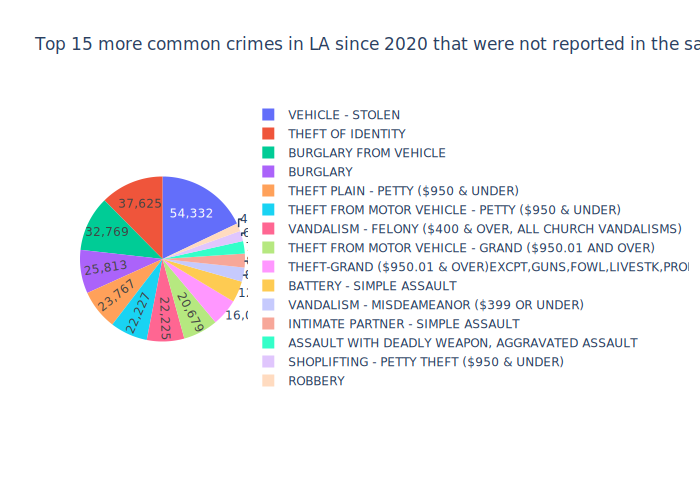

In [55]:
fig = px.pie(more0daysgrouped, values='DR_NO', names=more0daysgrouped.index, title='Top 15 more common crimes in LA since 2020 that were not reported in the same day')
fig.update_traces(textinfo='value')

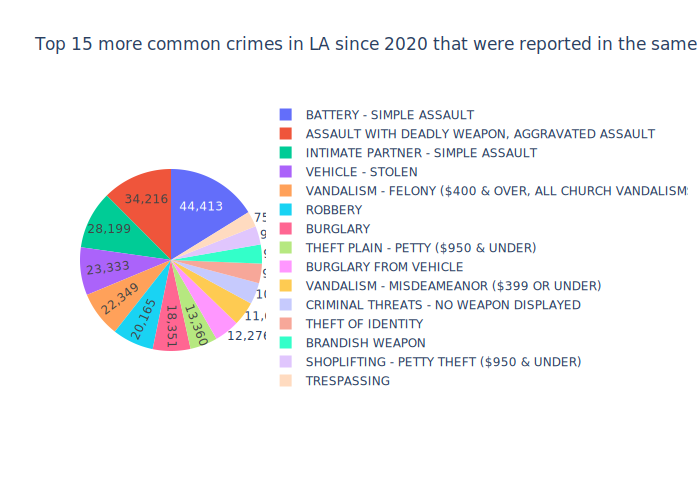

In [56]:
fig = px.pie(zerodaysgrouped, values='DR_NO', names=zerodaysgrouped.index, title='Top 15 more common crimes in LA since 2020 that were reported in the same day')
fig.update_traces(textinfo='value')

That's actually nice, we can see that the results are different. People tend to report in the same day crimes such as Battery - Simple Assault, Assault with deadly weapon and Intimate Partner -Simple Assault.

On the other hand, people tend to report in the next few days crimes such as vehicle steal, theft of identity and burglary from vehicle.

Now let's see if there are any relations between the victim's age and the crimes.

In [57]:
df['Vict Age'].value_counts()

 0      176828
 30      16742
 35      16342
 29      15956
 31      15950
         ...  
 98         56
 97         56
-1          43
-2           8
 120         1
Name: Vict Age, Length: 102, dtype: int64

In [58]:
df['Vict Age'].dtypes

dtype('int64')

In [59]:
age = df[df['Vict Age'] > 0]
age['Vict Age'].value_counts()

30     16742
35     16342
29     15956
31     15950
28     15675
       ...  
95        73
96        68
98        56
97        56
120        1
Name: Vict Age, Length: 99, dtype: int64

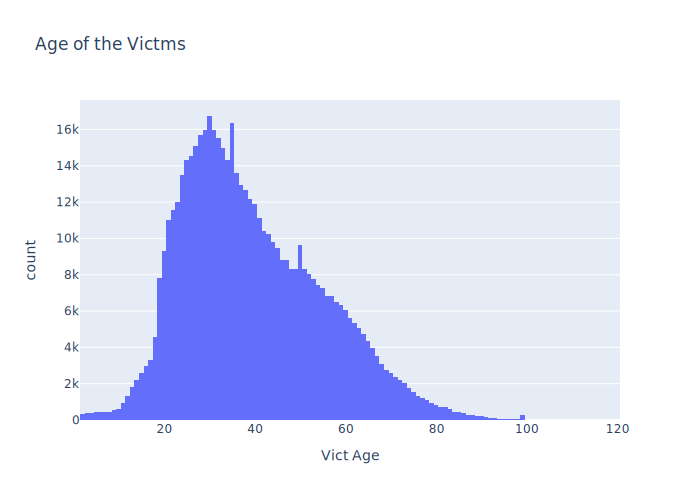

In [60]:
fig = px.histogram(age, x="Vict Age", title="Age of the Victms")
fig.show()

The behaviour looks like a normal curve, where the most common scenario is the victim being in their mid-30s.

Now let's see the average age for some crimes.

<ipython-input-61-7396be555006>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



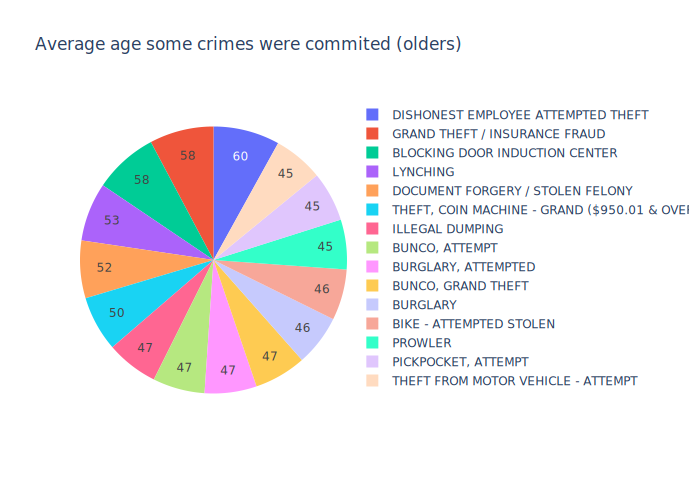

In [61]:
agegrouped = age.groupby(['Crm Cd Desc']).mean().sort_values(by='Vict Age', ascending=False).head(15).round(0)
fig = px.pie(agegrouped, values='Vict Age', names=agegrouped.index, title='Average age some crimes were commited (olders)')
fig.update_traces(textinfo='value')

For example, we can see that when a 'DISHONEST EMPLOYEE ATTEMPTED THEFT' crime was reported, the average age of the criminal was 60.

<ipython-input-62-c4e7aa2f5f1b>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



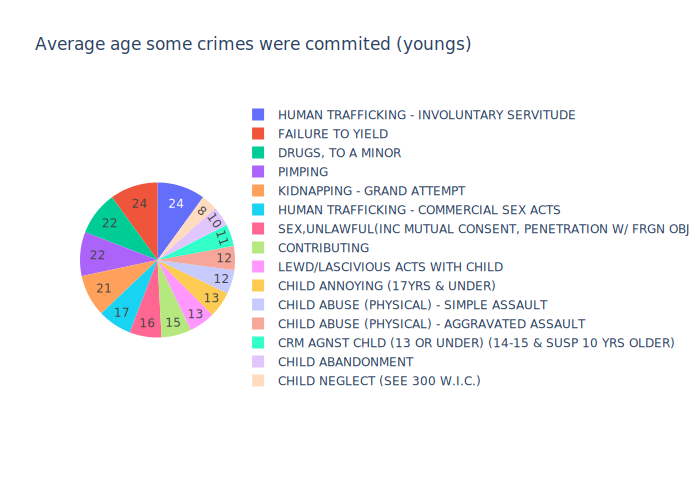

In [62]:
agegrouped = age.groupby(['Crm Cd Desc']).mean().sort_values(by='Vict Age', ascending=True).head(15).round(0)
fig = px.pie(agegrouped, values='Vict Age', names=agegrouped.index, title='Average age some crimes were commited (youngs)')
fig.update_traces(textinfo='value')

Now let's see it of another perspective.

Let's see which crime is the most common per age.

In [63]:
x = age.groupby(['Vict Age']).mean().round()
x

<ipython-input-63-6b8838122f1f>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
Vict Age,,,,,,,,,,,,,,
2,214551845.0,1377.0,11.0,1128.0,2.0,503.0,352.0,368.0,501.0,891.0,998.0,NaN,34.0,-118.0
3,214510989.0,1358.0,11.0,1124.0,2.0,539.0,370.0,369.0,536.0,889.0,998.0,NaN,34.0,-118.0
4,213614884.0,1299.0,12.0,1213.0,2.0,588.0,415.0,372.0,585.0,864.0,998.0,NaN,34.0,-118.0
5,214167697.0,1369.0,12.0,1228.0,2.0,618.0,427.0,372.0,614.0,865.0,998.0,NaN,34.0,-118.0
6,214586106.0,1339.0,11.0,1196.0,2.0,604.0,432.0,384.0,599.0,860.0,998.0,NaN,34.0,-118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,215094536.0,1178.0,11.0,1164.0,1.0,515.0,449.0,365.0,515.0,998.0,NaN,NaN,34.0,-118.0
97,216665229.0,1357.0,11.0,1162.0,2.0,536.0,406.0,407.0,536.0,756.0,NaN,NaN,34.0,-118.0
98,214426648.0,1343.0,12.0,1248.0,1.0,544.0,399.0,390.0,544.0,998.0,NaN,NaN,34.0,-118.0


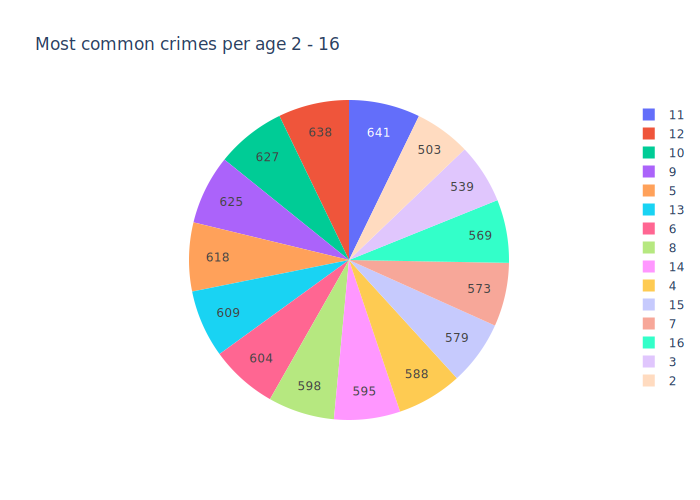

In [64]:
fig = px.pie(x[0:15], values='Crm Cd',names=x[0:15].index, title='Most common crimes per age 2 - 16')
fig.update_traces(textinfo='value')

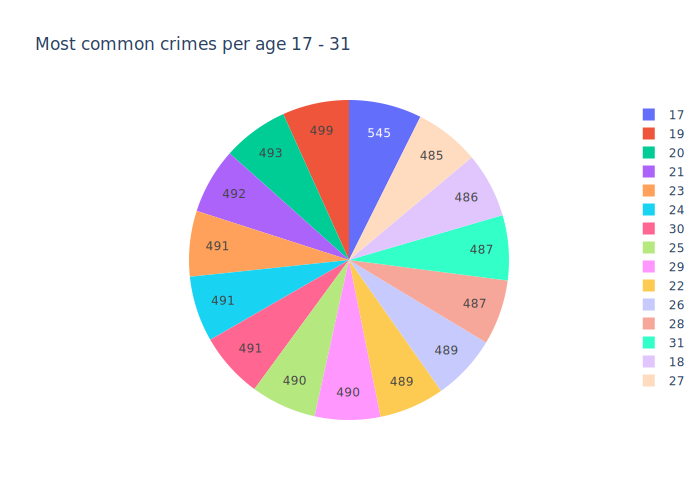

In [65]:
fig = px.pie(x[15:30], values='Crm Cd',names=x[15:30].index, title='Most common crimes per age 17 - 31')
fig.update_traces(textinfo='value')

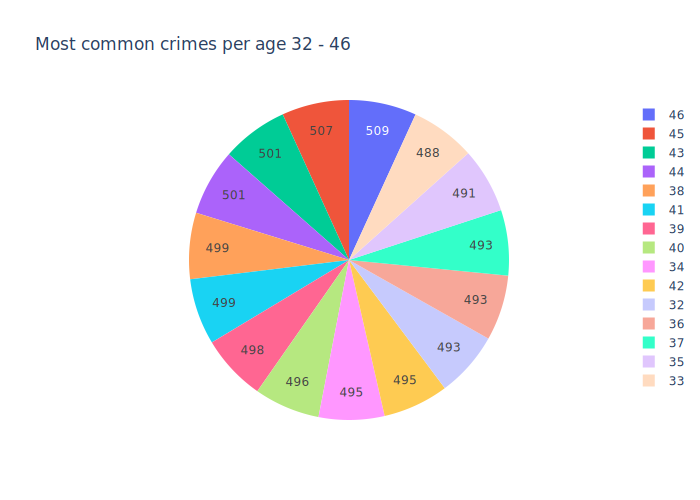

In [66]:
fig = px.pie(x[30:45], values='Crm Cd',names=x[30:45].index, title='Most common crimes per age 32 - 46')
fig.update_traces(textinfo='value')

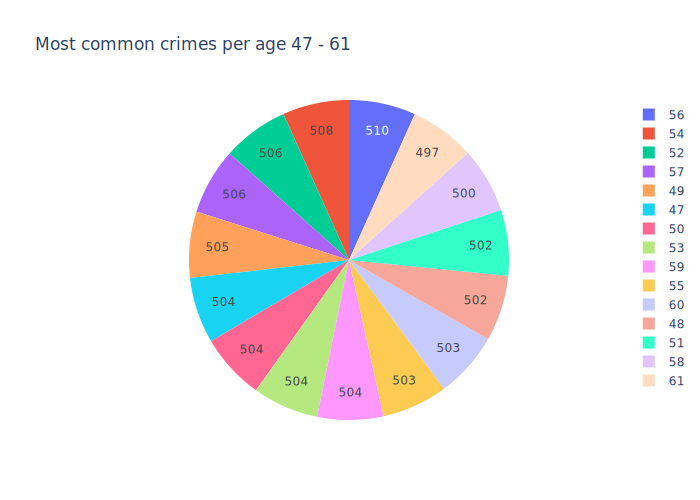

In [67]:
fig = px.pie(x[45:60], values='Crm Cd',names=x[45:60].index, title='Most common crimes per age 47 - 61')
fig.update_traces(textinfo='value')

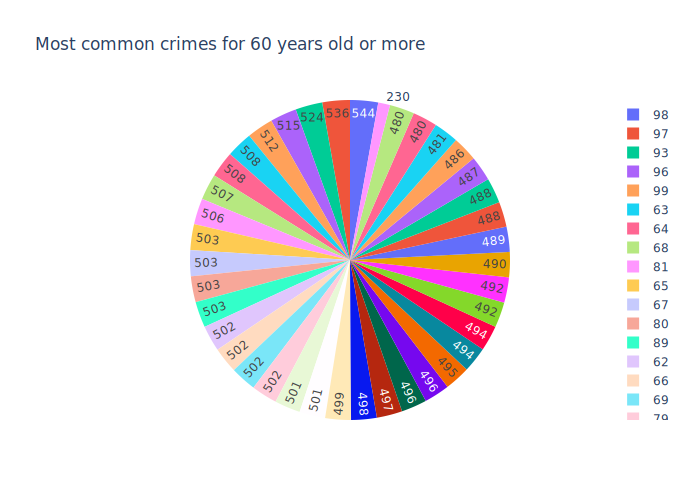

In [68]:
fig = px.pie(x[60:], values='Crm Cd',names=x[60:].index, title='Most common crimes for 60 years old or more')
fig.update_traces(textinfo='value')

Ok, that's not all clear, we could have the name instead of the code.

Let's try it and first let's join in the x dataframe the description of the crime:

In [69]:
y = df[['Crm Cd', 'Crm Cd Desc']]
print(y['Crm Cd'].unique())
print('--')
y['Crm Cd Desc'].unique()

[624 845 745 740 121 442 946 341 330 930 648 626 440 354 210 230 310 510
 420 761 236 662 350 860 480 623 956 900 888 331 901 886 421 647 940 810
 922 812 220 625 755 649 815 251 320 850 820 668 902 664 920 343 437 753
 928 910 760 762 661 351 821 237 903 813 666 627 805 763 441 122 443 450
 434 410 890 520 670 951 660 654 352 250 110 933 652 950 231 345 822 814
 932 622 471 235 470 921 906 433 651 943 653 436 439 806 949 522 446 113
 438 451 485 944 954 756 942 487 473 347 435 880 444 475 474 931 865 349
 452 353 870 924 840 948 884 904 830 445 432 882]
--


array(['BATTERY - SIMPLE ASSAULT',
       'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',
       'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BURGLARY', 'VEHICLE - STOLEN',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'BRANDISH WEAPON', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'BUNCO, GRAND THEFT', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'VIOLAT

In [70]:
data1 = y['Crm Cd'].unique()
z = pd.DataFrame(data1, columns=['Crm Cd'])
z['Crm Cd Desc'] = y['Crm Cd Desc'].unique()
z

,Crm Cd,Crm Cd Desc
0,624,BATTERY - SIMPLE ASSAULT
1,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
4,121,"RAPE, FORCIBLE"
...,...,...
133,904,FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS ...
134,830,INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)
135,445,DISHONEST EMPLOYEE ATTEMPTED THEFT
136,432,BLOCKING DOOR INDUCTION CENTER


In [71]:
k = x.merge(z, on='Crm Cd', how='left')
k

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,Crm Cd Desc
0,214551845.0,1377.0,11.0,1128.0,2.0,503.0,352.0,368.0,501.0,891.0,998.0,NaN,34.0,-118.0,NaN
1,214510989.0,1358.0,11.0,1124.0,2.0,539.0,370.0,369.0,536.0,889.0,998.0,NaN,34.0,-118.0,NaN
2,213614884.0,1299.0,12.0,1213.0,2.0,588.0,415.0,372.0,585.0,864.0,998.0,NaN,34.0,-118.0,NaN
3,214167697.0,1369.0,12.0,1228.0,2.0,618.0,427.0,372.0,614.0,865.0,998.0,NaN,34.0,-118.0,NaN
4,214586106.0,1339.0,11.0,1196.0,2.0,604.0,432.0,384.0,599.0,860.0,998.0,NaN,34.0,-118.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,215094536.0,1178.0,11.0,1164.0,1.0,515.0,449.0,365.0,515.0,998.0,NaN,NaN,34.0,-118.0,NaN
95,216665229.0,1357.0,11.0,1162.0,2.0,536.0,406.0,407.0,536.0,756.0,NaN,NaN,34.0,-118.0,NaN
96,214426648.0,1343.0,12.0,1248.0,1.0,544.0,399.0,390.0,544.0,998.0,NaN,NaN,34.0,-118.0,NaN
97,214272575.0,1373.0,11.0,1125.0,1.0,512.0,319.0,362.0,511.0,953.0,998.0,NaN,34.0,-118.0,NaN


We raised some issues because, since we got the average, rounded and the codes does not follow a sequence, we can get values that reflect the mean of the crimes commited but there is no code associated.

In [72]:
k['Crm Cd Desc'].value_counts(0)

BOAT - STOLEN                                     3
BIKE - STOLEN                                     2
OTHER ASSAULT                                     1
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT           1
BIKE - ATTEMPTED STOLEN                           1
VEHICLE - STOLEN                                  1
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    1
Name: Crm Cd Desc, dtype: int64

The thing is, this was not a statistcally good idea because the mean will not reflect what we want because the values of the codes are very different, the median or mode maybe.

Let's use the mode that we are certanly that for the respective age, that was the most common crime and move on.

In [73]:
mode = age.groupby(['Vict Age'])['Crm Cd Desc'].agg(pd.Series.mode)
mode = mode.to_frame()

Alright, here is what we wanted. Now, the last thing we are going to do with the age is to add the number of occurencies in this dataset above.

In [74]:
count = age.groupby('Vict Age').count()['DR_NO']
count = count.to_frame()

In [75]:
m = mode.merge(count, on='Vict Age', how='left')
m.rename(columns={"DR_NO": "Number of Occurenices"}, inplace=True)
m

,Crm Cd Desc,Number of Occurenices
Vict Age,,
2,CHILD NEGLECT (SEE 300 W.I.C.),321
3,CHILD NEGLECT (SEE 300 W.I.C.),377
4,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,394
5,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,450
6,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,432
...,...,...
96,BURGLARY,68
97,BATTERY - SIMPLE ASSAULT,56
98,THEFT PLAIN - PETTY ($950 & UNDER),56


Let's find out about the Vict Description now:

In [76]:
LATLON__['Vict Descent'].value_counts()

H    222474
W    148941
B    104133
X     68112
O     57195
A     15817
K      3844
F      2990
C      2708
J      1008
V       720
I       695
Z       355
P       192
U       145
D        50
G        48
L        44
S        40
-         1
Name: Vict Descent, dtype: int64

Let's use this code here to copy and change the Vict Descent column:

- Vict Descent: Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

Premis Cd: The type of structure, vehicle, or location where the crime took place.
Premis Desc: Defines the Premise Code provided.
Weapons Used Cd: The type of weapon used in the crime. Weapon Desc: Defines the Weapon Used Code provided.
Status: Status of the case. (IC is the default)
Status Desc: Defines the Status Code provided.
Crm Cd 1: Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.

In [77]:
LATLON__['Vict Descent'] = LATLON__['Vict Descent'].replace(['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J','K', 'L', 'O', 'P', 'S', 'U', 'V', 'W', 'X', 'Z', '-'],
                                                            ['Other Asian','Black','Chinese','Cambodian','Filipino','Guamanian','Hispanic/Latin/Mexican',
                                                             'American Indian/Alaska Native','Japanese','Korean','Laotian','Other','Pacific Islander','Samoan',
                                                             'Hawaiian','Vietnamese', 'White','Unknown','Asian Indian', 'Hispanic/Latin/Mexican'])
LATLON__['Vict Descent']

<ipython-input-77-4d0171945f3f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                          Black
1         Hispanic/Latin/Mexican
2                        Unknown
3                          White
4                        Unknown
                   ...          
726526    Hispanic/Latin/Mexican
726527    Hispanic/Latin/Mexican
726528                     Black
726529    Hispanic/Latin/Mexican
726530    Hispanic/Latin/Mexican
Name: Vict Descent, Length: 724265, dtype: object

In [78]:
LATLON__.groupby('Vict Descent').count().sort_values(by='DR_NO', ascending=False)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DATE OCC 2,Date Rptd 2,Checking_Dates
Vict Descent,,,,,,,,,,,,,,,,,,,,,
Hispanic/Latin/Mexican,222475,222475,222475,222475,222475,222475,222475,222475,222475,222475,...,20579,935,22,222475,42384,222475,222475,222475,222475,222475
White,148941,148941,148941,148941,148941,148941,148941,148941,148941,148941,...,10175,278,14,148941,19401,148941,148941,148941,148941,148941
Black,104133,104133,104133,104133,104133,104133,104133,104133,104133,104133,...,8431,341,11,104133,18922,104133,104133,104133,104133,104133
Unknown,68112,68112,68112,68112,68112,68112,68112,68112,68112,68112,...,8475,78,2,68112,7798,68112,68112,68112,68112,68112
Other,57195,57195,57195,57195,57195,57195,57195,57195,57195,57195,...,4540,129,3,57195,6561,57195,57195,57195,57195,57195
Other Asian,15817,15817,15817,15817,15817,15817,15817,15817,15817,15817,...,1217,36,2,15817,1966,15817,15817,15817,15817,15817
Korean,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,...,81,3,0,3844,552,3844,3844,3844,3844,3844
Filipino,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,...,28,1,0,2990,472,2990,2990,2990,2990,2990
Chinese,2708,2708,2708,2708,2708,2708,2708,2708,2708,2708,...,15,0,0,2708,337,2708,2708,2708,2708,2708


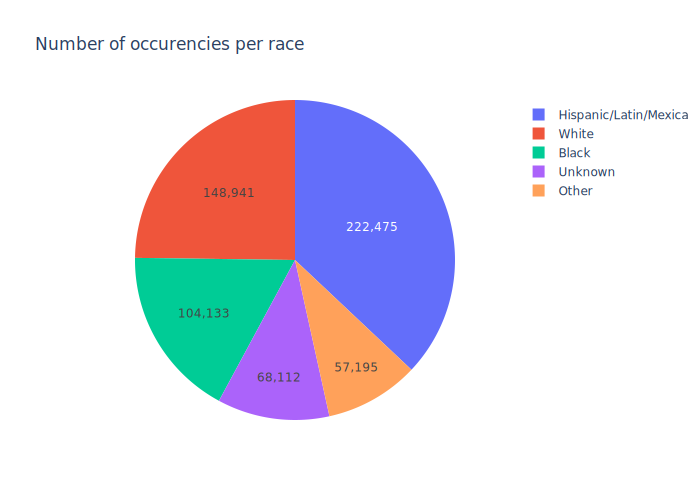

In [79]:
l = LATLON__.groupby('Vict Descent').count().sort_values(by='DR_NO', ascending=False)
fig = px.pie(l.head(5), values='DR_NO',names=l.head(5).index, title='Number of occurencies per race')
fig.update_traces(textinfo='value')

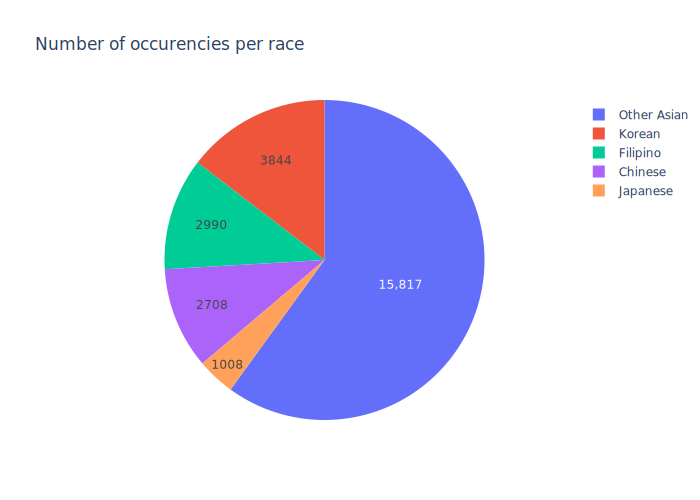

In [80]:
fig = px.pie(l[5:10], values='DR_NO',names=l[5:10].index, title='Number of occurencies per race')
fig.update_traces(textinfo='value')

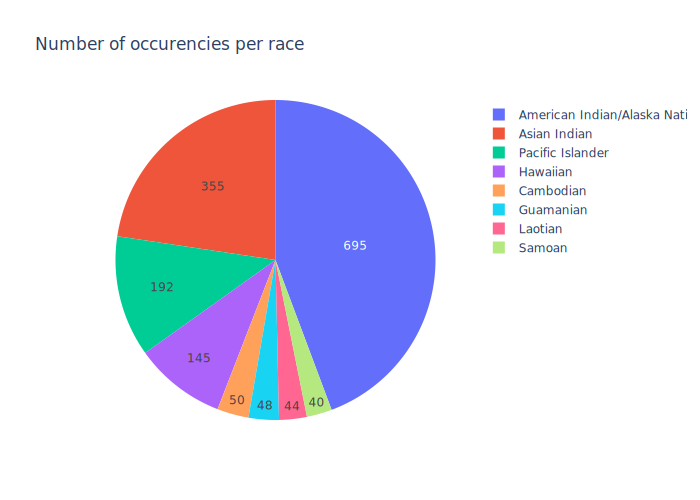

In [81]:
fig = px.pie(l.tail(8), values='DR_NO',names=l.tail(8).index, title='Number of occurencies per race')
fig.update_traces(textinfo='value')

Let's see now about the victm's sex:

So we can remember:
Vict Sex: F - Female M - Male X - Unknown

In [82]:
LATLON__.groupby('Vict Sex').count()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DATE OCC 2,Date Rptd 2,Checking_Dates
Vict Sex,,,,,,,,,,,,,,,,,,,,,
F,267733,267733,267733,267733,267733,267733,267733,267733,267733,267733,...,18226,876,31,267733,37718,267733,267733,267733,267733,267733
H,82,82,82,82,82,82,82,82,82,82,...,3,0,0,82,12,82,82,82,82,82
M,300366,300366,300366,300366,300366,300366,300366,300366,300366,300366,...,27853,856,22,300366,54200,300366,300366,300366,300366,300366
X,61337,61337,61337,61337,61337,61337,61337,61337,61337,61337,...,7495,70,1,61337,6920,61337,61337,61337,61337,61337


Let's exclude the 'H' because we don't know what means and there are few examples.

In [83]:
sex = duckdb.sql("""
              SELECT * FROM df WHERE "Vict Sex" != 'H'
                """).df()
sex = sex.groupby('Vict Sex').count()

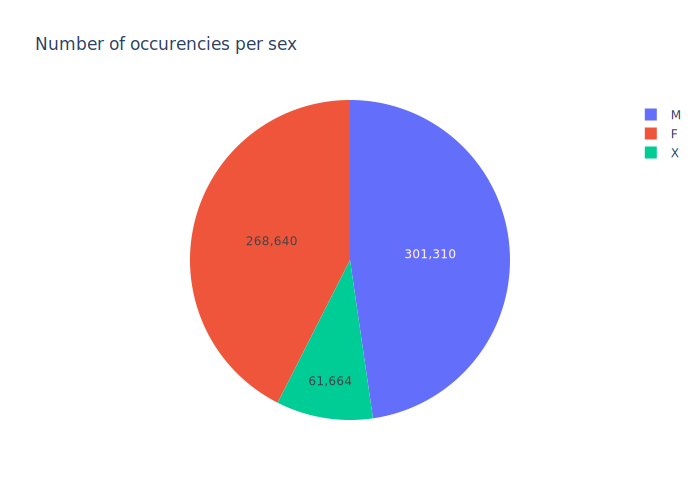

In [84]:
fig = px.pie(sex, values='DR_NO',names=sex.index, title='Number of occurencies per sex')
fig.update_traces(textinfo='value')

Now let's take a look at the Premis CD and, just to remeber:

Premis Cd: The type of structure, vehicle, or location where the crime took place.
Premis Desc: Defines the Premise Code provided.

In [85]:
LATLON__['Premis Desc'].value_counts()

STREET                                          182241
SINGLE FAMILY DWELLING                          122948
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     88914
PARKING LOT                                      51667
OTHER BUSINESS                                   33756
                                                 ...  
MTA - SILVER LINE - DOWNTOWN STREET STOPS            2
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
DEPT OF DEFENSE FACILITY                             1
MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT         1
HARBOR FRWY STATION (NOT LINE SPECIFIC)              1
Name: Premis Desc, Length: 306, dtype: int64

In [86]:
premis = LATLON__.groupby('Premis Desc').count().sort_values(by='DR_NO', ascending=False)
premis.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DATE OCC 2,Date Rptd 2,Checking_Dates
Premis Desc,,,,,,,,,,,,,,,,,,,,,
STREET,182241,182241,182241,182241,182241,182241,182241,182241,182241,182241,...,13026,353,7,182241,67812,182241,182241,182241,182241,182241
SINGLE FAMILY DWELLING,122948,122948,122948,122948,122948,122948,122948,122948,122948,122948,...,8908,376,10,122948,2006,122948,122948,122948,122948,122948
"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",88914,88914,88914,88914,88914,88914,88914,88914,88914,88914,...,6936,347,12,88914,1326,88914,88914,88914,88914,88914
PARKING LOT,51667,51667,51667,51667,51667,51667,51667,51667,51667,51667,...,3419,122,4,51667,6133,51667,51667,51667,51667,51667
OTHER BUSINESS,33756,33756,33756,33756,33756,33756,33756,33756,33756,33756,...,3033,64,0,33756,1241,33756,33756,33756,33756,33756
SIDEWALK,31342,31342,31342,31342,31342,31342,31342,31342,31342,31342,...,3592,113,2,31342,15380,31342,31342,31342,31342,31342
"VEHICLE, PASSENGER/TRUCK",21832,21832,21832,21832,21832,21832,21832,21832,21832,21832,...,1185,32,0,21832,5835,21832,21832,21832,21832,21832
GARAGE/CARPORT,14826,14826,14826,14826,14826,14826,14826,14826,14826,14826,...,625,13,1,14826,445,14826,14826,14826,14826,14826
DRIVEWAY,12230,12230,12230,12230,12230,12230,12230,12230,12230,12230,...,598,24,1,12230,457,12230,12230,12230,12230,12230


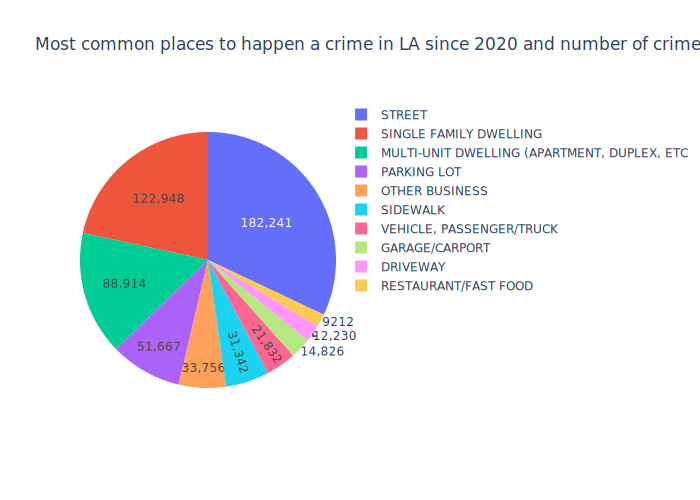

In [87]:
fig = px.pie(premis.head(10), values='DR_NO',names=premis.head(10).index, title='Most common places to happen a crime in LA since 2020 and number of crimes')
fig.update_traces(textinfo='value')

Last graphic analysis, let's see the most common weapons used.

In [88]:
LATLON__['Weapon Desc'].value_counts()

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    134838
UNKNOWN WEAPON/OTHER WEAPON                        25948
VERBAL THREAT                                      18599
HAND GUN                                           15569
SEMI-AUTOMATIC PISTOL                               5764
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: Weapon Desc, Length: 79, dtype: int64

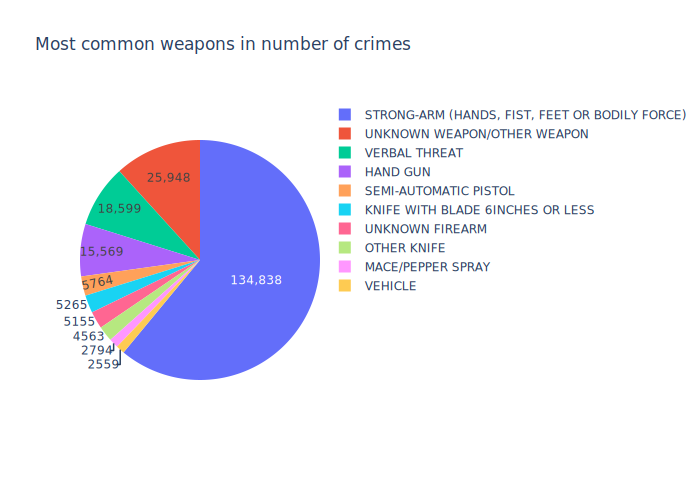

In [89]:
weapon = LATLON__.groupby('Weapon Desc').count().sort_values(by='DR_NO', ascending=False)
fig = px.pie(weapon.head(10), values='DR_NO',names=weapon.head(10).index, title='Most common weapons in number of crimes')
fig.update_traces(textinfo='value')

That's not very accurate however because some policemen reported and detailed the gun used, for example:
- MAC-11 SEMIAUTOMATIC ASSAULT WEAPON
- MAC-10 SEMIAUTOMATIC ASSAULT WEAPON
- M1-1 SEMIAUTOMATIC ASSAULT RIFLE
- HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE
- M-14 SEMIAUTOMATIC ASSAULT RIFLE

Those are all semiautomatic guns. In Addition, most of this column has null values, so its not reliable information and we will not use it for anything more.

In [90]:
print(f'number of empty rows in Weapon Desc column : {LATLON__["Weapon Desc"].isnull().sum()}')

number of empty rows in Weapon Desc column : 473019


Now, let's add the MoCodes Description to the dataset. The MoCode is the Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order.

First, let's read the pdf and convert it into text:

In [91]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.4 MB/s eta 0:00:00


In [92]:
# importing required modules
import PyPDF2

# creating a pdf file object
pdfFileObj = open('/content/drive/MyDrive/Colab Notebooks/datasets/MO_CODES_Numerical_20191119.pdf', 'rb')

# creating a pdf reader object
pdfReader = PyPDF2.PdfReader(pdfFileObj)

output = []

# creating a page object
for i in range(len(pdfReader.pages)):
    page = pdfReader.pages[i]
    output.append(page.extract_text())
    #output += page.extract_text()

print(output)

# closing the pdf file object
pdfFileObj.close()

['REV: 07/19\n0100 Suspect Impersonate\n0101 Aid victim\n0102 Blind\n0103 Physically disabled\n0104 Customer\n0105 Delivery\n0106 Doctor\n0107 God\n0108 Infirm\n0109 Inspector\n0110 Involved in traffic/accident\n0112 Police\n0113 Renting\n0114 Repair Person\n0115 Returning stolen property\n0116 Satan\n0117 Salesman\n0118 Seeking someone\n0119 Sent by owner\n0120 Social Security/Medicare\n0121 DWP/Gas Company/Utility worker\n0122 Contractor\n0123 Gardener/Tree Trimmer\n0200 Suspect wore disguise\n0201 Bag\n0202 Cap/hat\n0203 Cloth (with eyeholes)\n0204 Clothes of opposite sex\n0205 Earring\n0206 Gloves\n0207 Handkerchief\n0208 Halloween mask\n0209 Mask\n0210 Make up (males only)\n0211 Shoes\n0212 Nude/partly nude\n0213 Ski mask\n0214 Stocking\n0215 Unusual clothes\n0216 Suspect wore hood/hoodie\n0217 Uniform\n0218 Wig\n0219 Mustache-Fake\n0220 Suspect wore motorcycle helmetMO CODES\nNUMERICAL\n1 of 19', 'REV: 07/19\n0301 Escaped on (used) transit train\n0302 Aimed gun\n0303 Ambushed\n03

Now let's create a dataset called MoCodes with the result:

In [93]:
# Empty lists to store codes and descriptions
codes = []
descriptions = []

# Iterate over the list and extract codes and descriptions
for item in output:
    lines = item.split('\n')  # Split the item by newline character
    for line in lines:
            code = line[:4]  # Extract the code (first 4 characters)
            description = line[5:]  # Extract the description (after the code)
            codes.append(code.strip())  # Strip leading/trailing whitespaces and append to codes list
            descriptions.append(description.strip())  # Strip leading/trailing whitespaces and append to descriptions list

# Create a pandas dataframe
MoCodes = pd.DataFrame({'Mocodes1': codes, 'MoDescription': descriptions})

# Display the dataframe
MoCodes

,Mocodes1,MoDescription
0,REV:,07/19
1,0100,Suspect Impersonate
2,0101,Aid victim
3,0102,Blind
4,0103,Physically disabled
...,...,...
877,4025,T/C - South Traffic (STD)
878,4026,T/C - Valley Traffic (VTD)
879,4027,T/C - West Traffic (WTD)TRAFFIC COLLISION MO C...
880,NUME,ICAL


Let's clean the dataset and leave only relevant and true information about the codes.

In [94]:
for index in MoCodes.index:
  if str(MoCodes['Mocodes1'][index]).isnumeric() and len(MoCodes['Mocodes1'][index]) == 4:
    pass
  else:
      MoCodes.drop(index, inplace=True)
MoCodes

,Mocodes1,MoDescription
1,0100,Suspect Impersonate
2,0101,Aid victim
3,0102,Blind
4,0103,Physically disabled
5,0104,Customer
...,...,...
875,4021,T/C - Topanga
876,4024,T/C - Central Traffic (CTD)
877,4025,T/C - South Traffic (STD)
878,4026,T/C - Valley Traffic (VTD)


OK, looks like we have a little situation here: There can be more than 1 MoCode per crime reported.

In [95]:
LATLON__['Mocodes'].isnull().sum()

99518

That's a lot of null values in the MoCodes. We could ignore the empty values and add the description using the new dataset we create just for fun, because we would't use this information anymore.

Let's do it.

Let's divide the MoCodes into new columns:

In [96]:
LATLON__['Mocodes1'] = LATLON__['Mocodes'].apply(lambda mocode : mocode[0:4] if pd.isnull(mocode) == False else mocode)

<ipython-input-96-7ac6bb993e61>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
LATLON__['Mocodes1']

0         0444
1         0416
2         1501
3         0329
4         0329
          ... 
726526    1300
726527    0416
726528    0601
726529    0394
726530    0329
Name: Mocodes1, Length: 724265, dtype: object

In [98]:
LATLON__ = LATLON__.merge(MoCodes, on='Mocodes1', how='left')

In [99]:
f = LATLON__.groupby('MoDescription').count().sort_values(by='DR_NO', ascending=False)

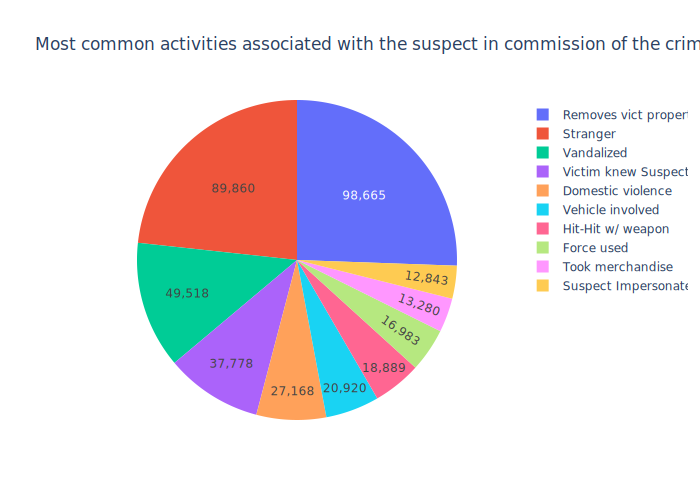

In [100]:
fig = px.pie(f.head(10), values='DR_NO',names=f.head(10).index, title='Most common activities associated with the suspect in commission of the crime')
fig.update_traces(textinfo='value')

Let's check the status now and its mean:

In [101]:
LATLON__['Status Desc'].value_counts()

Invest Cont     578856
Adult Other      78414
Adult Arrest     63529
Juv Arrest        2272
Juv Other         1192
UNK                  2
Name: Status Desc, dtype: int64

I thought it was something else, let's move on for the correlations:

In [102]:
LATLON__.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'DATE OCC 2', 'Date Rptd 2', 'Checking_Dates', 'Mocodes1',
       'MoDescription'],
      dtype='object')

<ipython-input-105-6e6df1c0a278>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



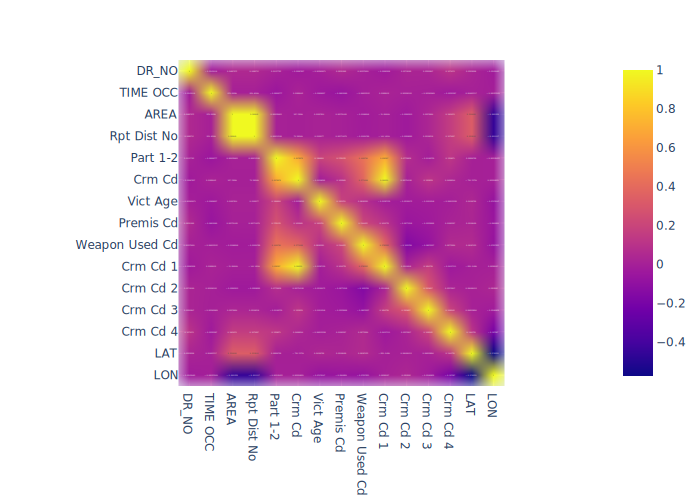

In [105]:
corr = LATLON__.corr()
fig = px.imshow(corr, text_auto=True)
fig.show()

In [106]:
!pip install -U kaleido==0.2.1

Not very clear. Let's try to find just the bigger correlations:

In [107]:
corr

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
DR_NO,1.000000,-0.024291,0.048580,0.048871,0.011278,-0.030678,-0.003910,0.052516,0.003375,-0.030639,0.027182,0.025938,0.107347,0.025283,-0.024395
TIME OCC,-0.024291,1.000000,0.000878,0.000929,-0.055008,0.018564,-0.036580,-0.068160,-0.006033,0.018584,0.002690,-0.002070,-0.032534,0.004602,-0.005322
AREA,0.048580,0.000878,1.000000,0.999045,0.009336,0.000187,0.015578,0.002791,-0.019660,-0.000031,-0.035630,0.032767,0.156107,0.334049,-0.450133
Rpt Dist No,0.048871,0.000929,0.999045,1.000000,0.009212,0.000073,0.015558,0.002711,-0.019348,-0.000144,-0.035981,0.031962,0.157350,0.331814,-0.451112
Part 1-2,0.011278,-0.055008,0.009336,0.009212,1.000000,0.697888,0.195660,0.270248,0.440578,0.698387,0.077266,-0.011607,0.125987,0.005568,-0.003135
Crm Cd,-0.030678,0.018564,0.000187,0.000073,0.697888,1.000000,-0.012983,0.102057,0.377446,0.999291,0.002754,0.120303,0.040683,-0.000726,0.002819
Vict Age,-0.003910,-0.036580,0.015578,0.015558,0.195660,-0.012983,1.000000,0.192975,0.081834,-0.012871,-0.021592,-0.015102,-0.006533,0.041568,-0.074761
Premis Cd,0.052516,-0.068160,0.002791,0.002711,0.270248,0.102057,0.192975,1.000000,0.210442,0.101978,-0.057742,-0.033289,0.015834,0.031064,-0.056486
Weapon Used Cd,0.003375,-0.006033,-0.019660,-0.019348,0.440578,0.377446,0.081834,0.210442,1.000000,0.378330,-0.152571,-0.080703,0.057703,0.061874,-0.075378
Crm Cd 1,-0.030639,0.018584,-0.000031,-0.000144,0.698387,0.999291,-0.012871,0.101978,0.378330,1.000000,0.024165,0.165474,-0.041371,-0.000820,0.002892


In [108]:
corr_columns_list = corr.columns.tolist()
for column in corr_columns_list:
  for row in corr[column]:
      if abs(row) > 0.4 and row != 1:
        print(column, row)

AREA 0.9990446694533185
AREA -0.4501327957703189
Rpt Dist No 0.9990446694533185
Rpt Dist No -0.45111173268065125
Part 1-2 0.6978877606703743
Part 1-2 0.44057844545226943
Part 1-2 0.6983869969328744
Crm Cd 0.6978877606703743
Crm Cd 0.9992905272952699
Weapon Used Cd 0.44057844545226943
Crm Cd 1 0.6983869969328744
Crm Cd 1 0.9992905272952699
LAT -0.574525089939856
LON -0.4501327957703189
LON -0.45111173268065125
LON -0.574525089939856


To be more specific, the ideal would be to transform using one hot enconding(get_dummies panda's function) all values that are categorical (Vict Sex, for example) and recheck the correlations.

How we are not going to create a ML model and there is no target variable, let's not and just analyze what we have so far.

For example, we can observe that the weapom used has a strong correlation with the crime code,what makes sense, heavier crimes tend to us more dangerous weapons.

Now using the msno lib, let's see the correlation between null values and not-null values:

<Axes: >

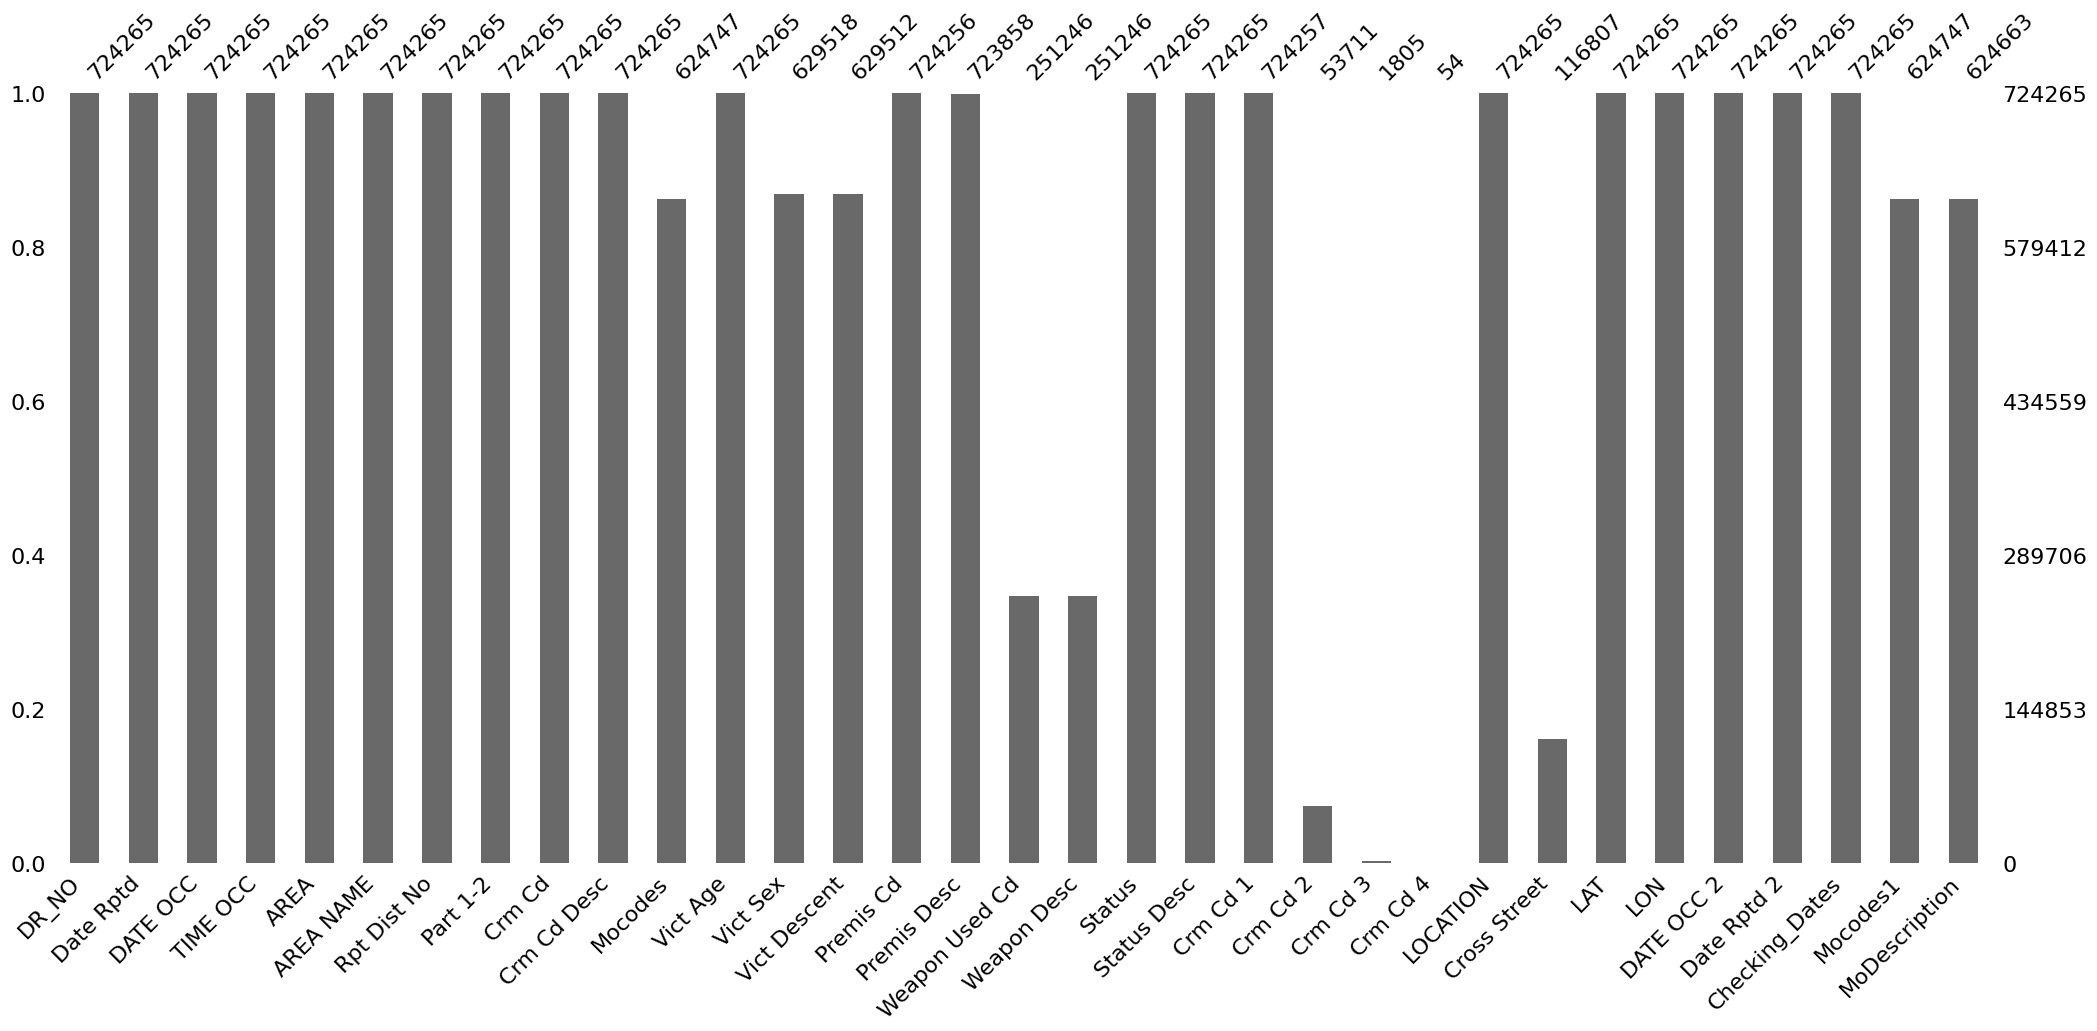

In [109]:
LATLON_.isna().sum()
msno.bar(LATLON__)

<Axes: >

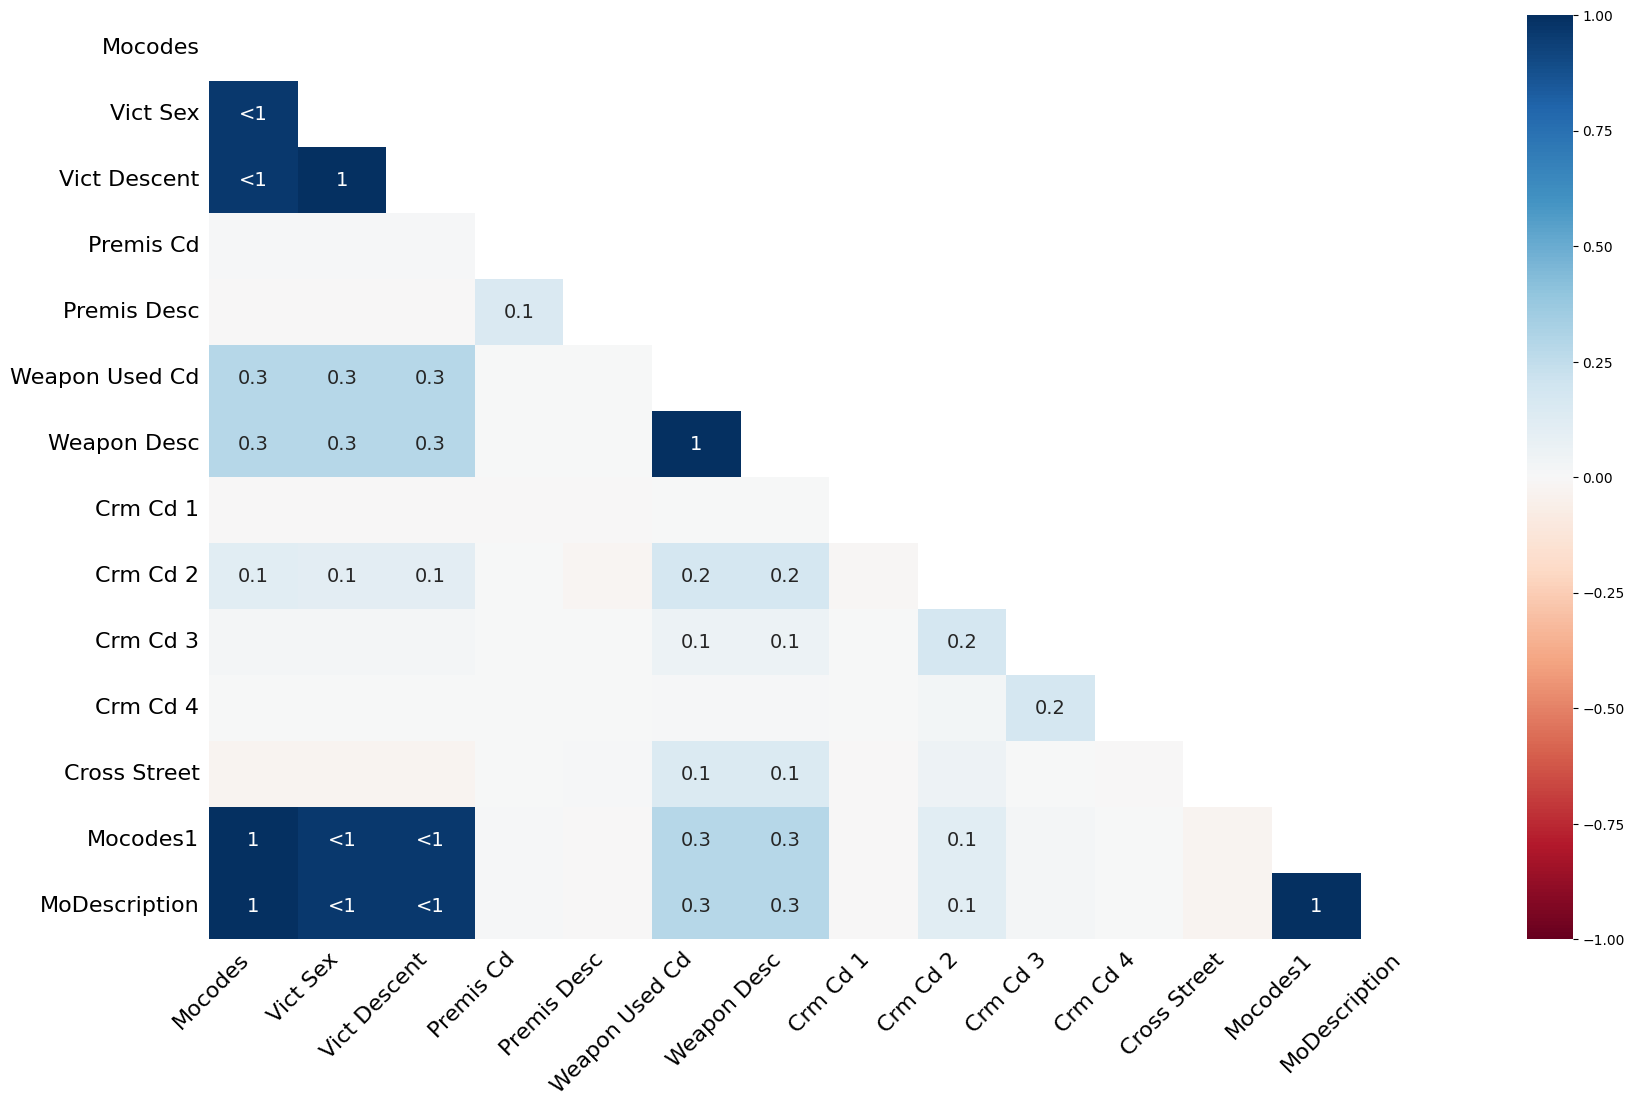

In [110]:
msno.heatmap(LATLON__)

The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.

There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

Analyzing our dataset, we can observe that there are no strong correlation between Vict Sex and Vict Descent, in other words, there is a relationship in the presence of null values between each of the columns.

Let's generate a dendogram now:

<Axes: >

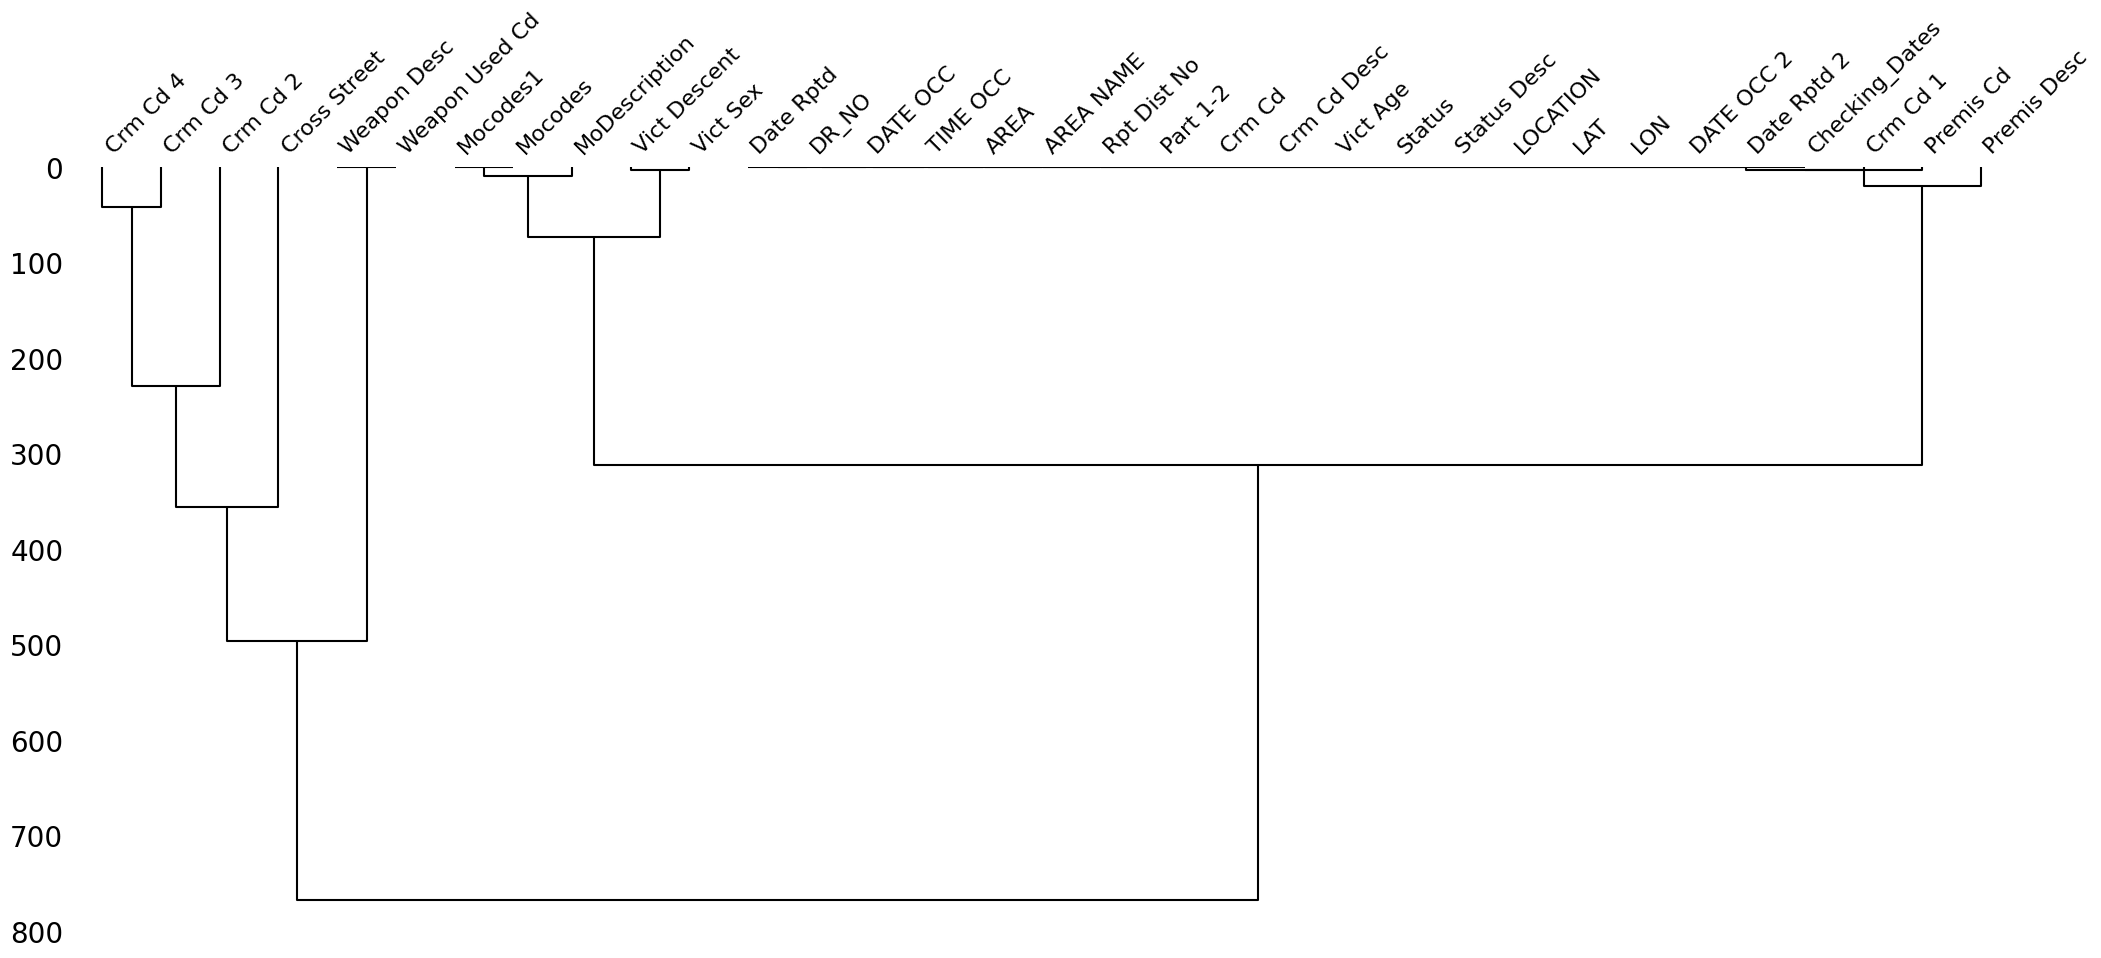

In [111]:
msno.dendrogram(LATLON__)

The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.

If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.

In the dendrogram plot above, we can see we have two distinct groups. The first is on the right side (Crm Cd 1, Premis Cd and Premis Desc) which all have a high degree of non-null values. The second is on the left, with the remainder of the columns which are less complete.

Date_Rptd to Premis Cd  are all grouped together at zero indicating that they are complete.

Crm Cd 4 to Weapons used Cd are grouped together not close to zero. MoDescription is in the same larger branch suggesting that some of the missing values present within that column can be correlated with Mocodeds and Mocodes1. Same happens to Crm Cd 4,3,2 and Cross Street with Weapon Desc and Weapon Used Cd.